# GAUSSIAN BLURRING

In [98]:
import numpy as np
import os
from scipy.ndimage import gaussian_filter

def apply_gaussian_smoothing_to_folder(input_folder, output_folder, sigma=1.0):
    """
    Verilen klasördeki tüm .npy dosyalarına Gaussian smoothing uygular.
    
    Parametreler:
    - input_folder (str): Giriş dosyalarının bulunduğu klasör yolu.
    - output_folder (str): İşlenmiş dosyaların kaydedileceği klasör yolu.
    - sigma (float): Gaussian kernel'in standard sapması.
    """
    if not os.path.exists(input_folder):
        print("Input folder does not exist.")
        return
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    files = [f for f in os.listdir(input_folder) if f.endswith('.npy')]
    
    for file in files:
        file_path = os.path.join(input_folder, file)
        data = np.load(file_path)
        
        # Gaussian smoothing uygula
        smoothed_data = gaussian_filter(data, sigma=sigma)
        
        # Yeni veriyi kaydet
        new_file_path = os.path.join(output_folder, file)
        np.save(new_file_path, smoothed_data)
        print(f"Processed {file} and saved to {output_folder}")

# Parametreler
input_folder = 'C:/Users/bb26k/Desktop/weighting/orginal'
output_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Gaussian smoothing işlemi sigma değeri ile
sigma_value = 0.85
radius = 1
apply_gaussian_smoothing_to_folder(input_folder, output_folder, sigma=sigma_value)


Processed altenburg_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed erfurt_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed gera_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed gotha_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed jena_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed schmalkalden_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed sondershausen_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed sonneberg_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed suhl_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed
Processed weimar_building_volume.npy and saved to C:/Users/bb26k/Desktop/weighting/smoothed


# VISUALIZATION OF AIR TEMPERATURE, BUILDING VOLUME AND GAUSSIAN BLURRED BUILDING VOLUME. (IT IS BLURED TO CONSIDER SPATIAL RELATIONS)

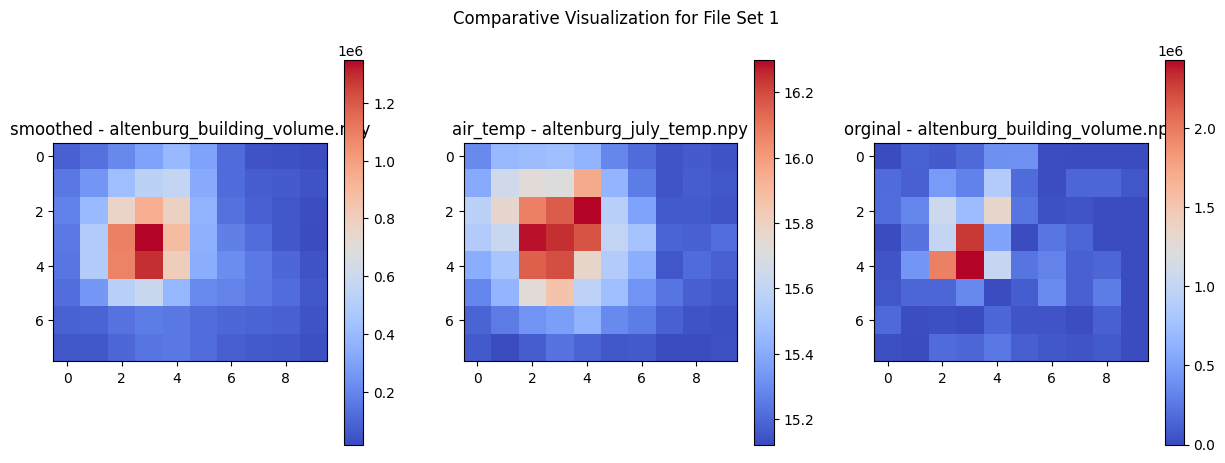

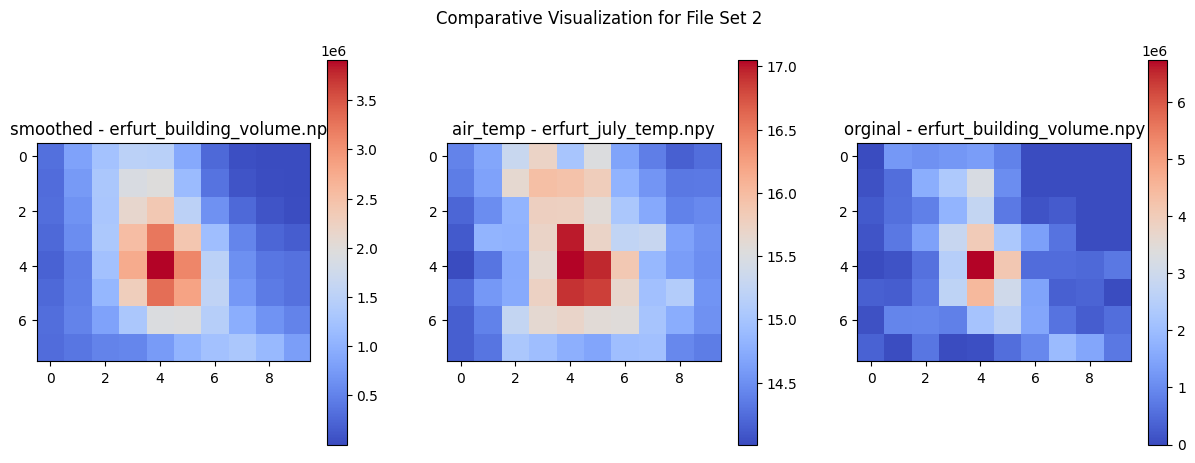

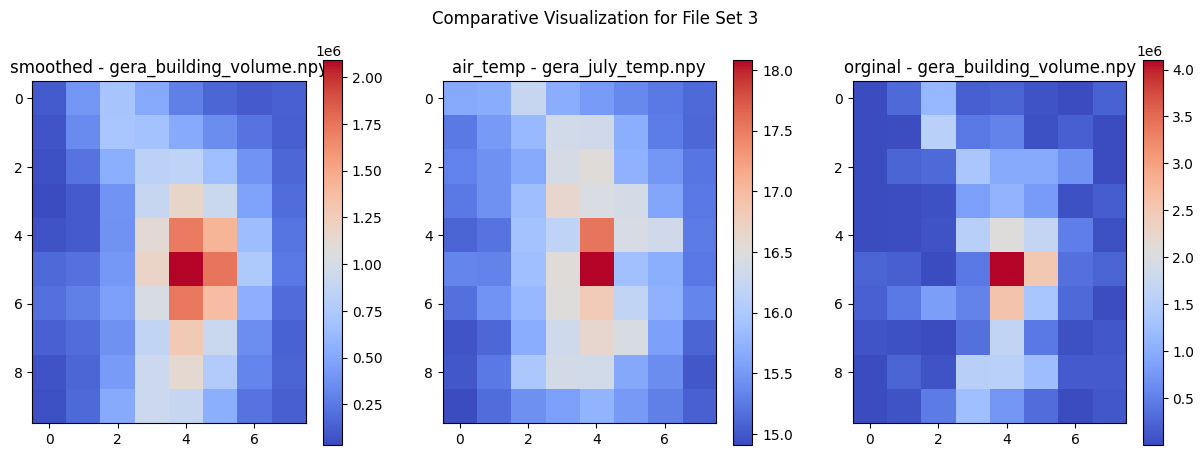

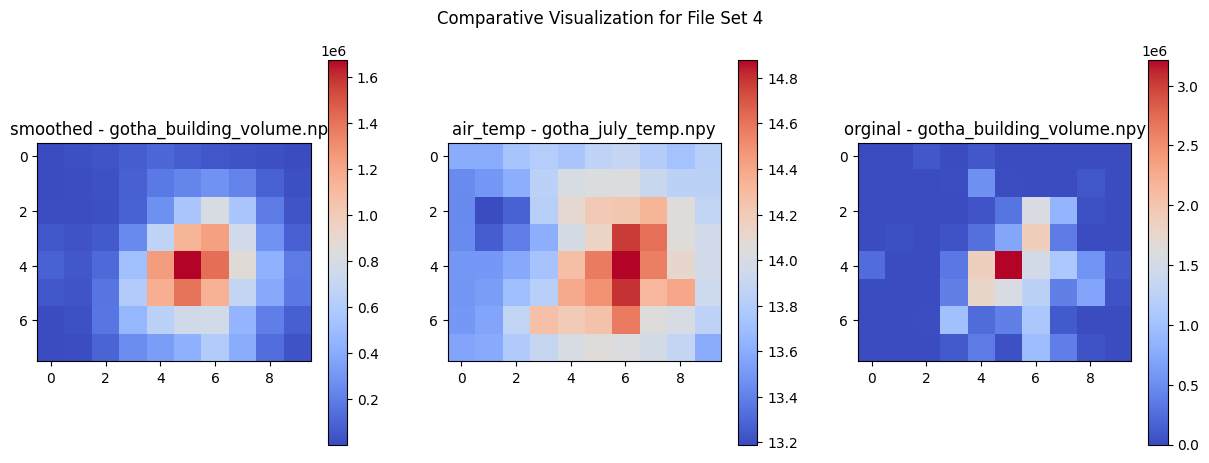

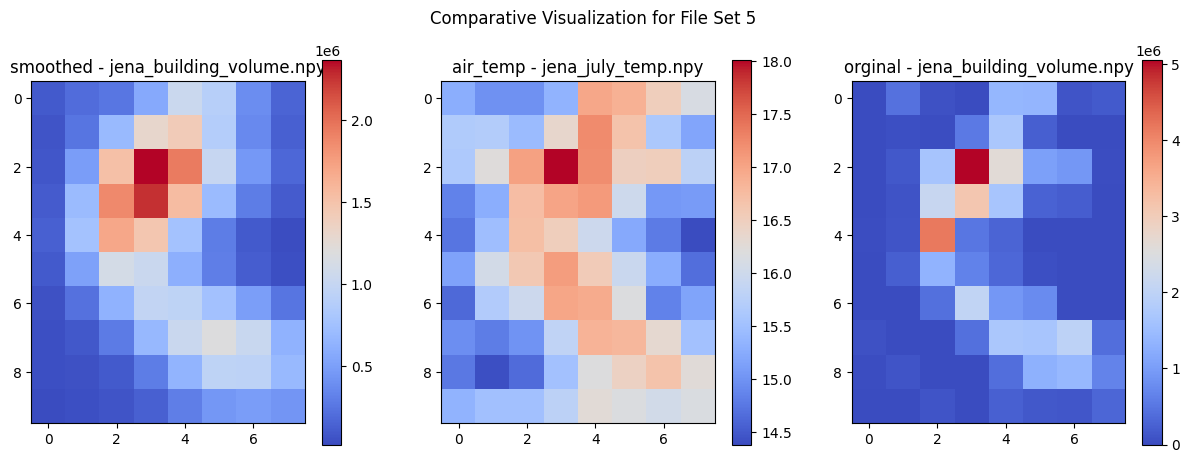

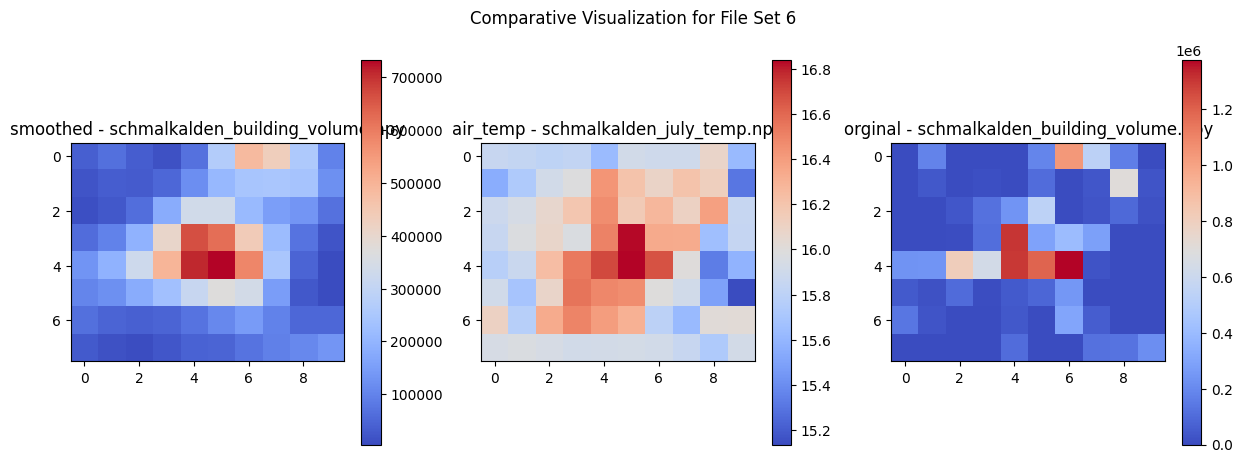

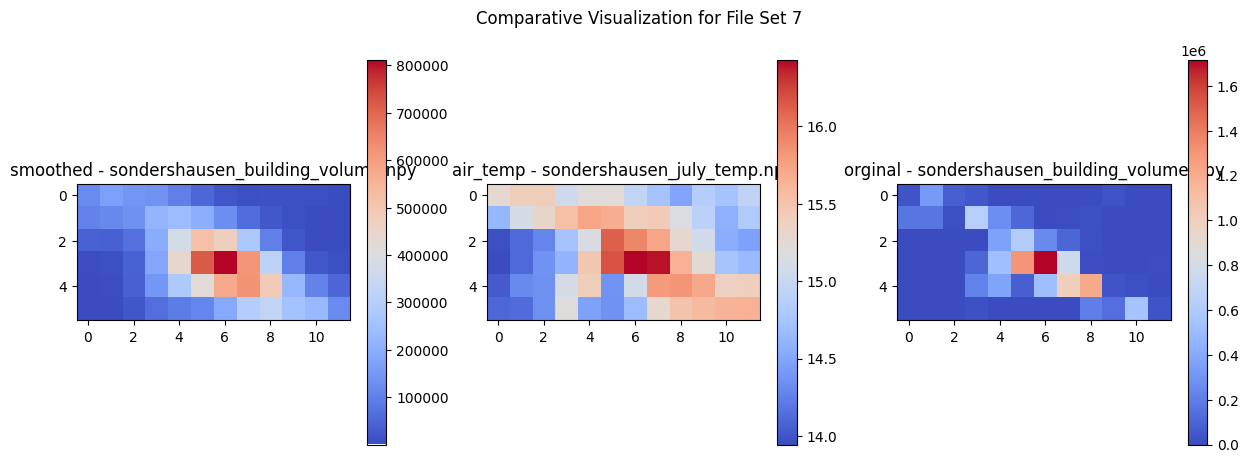

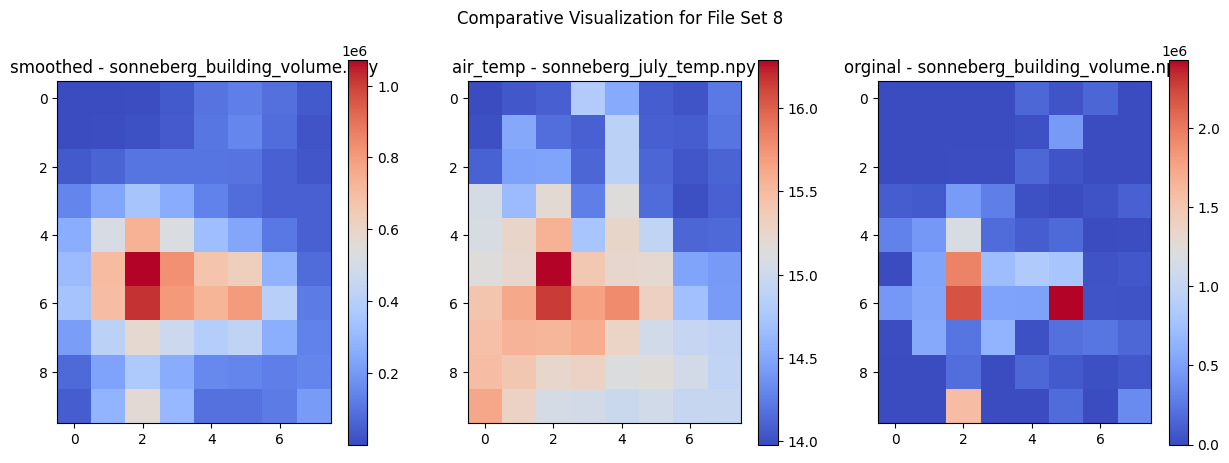

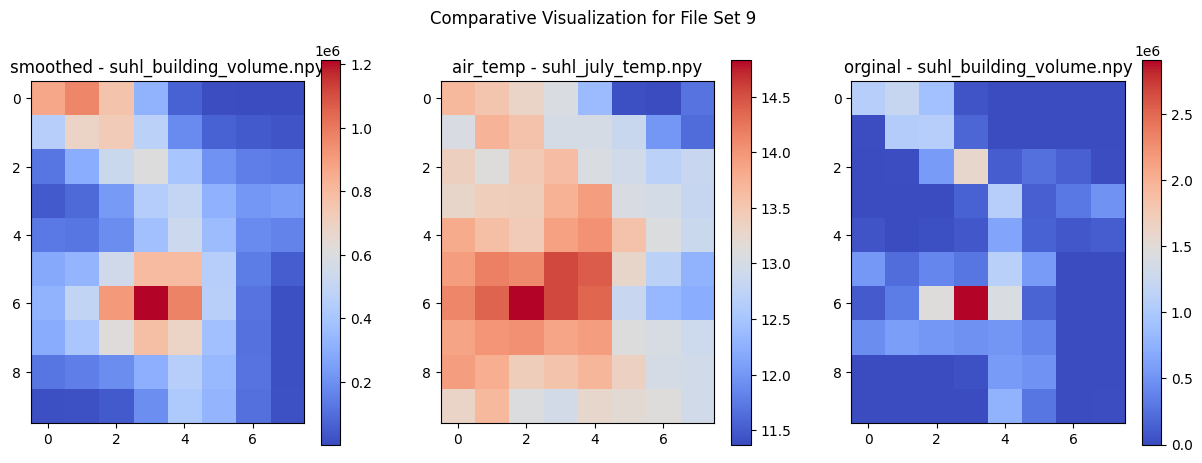

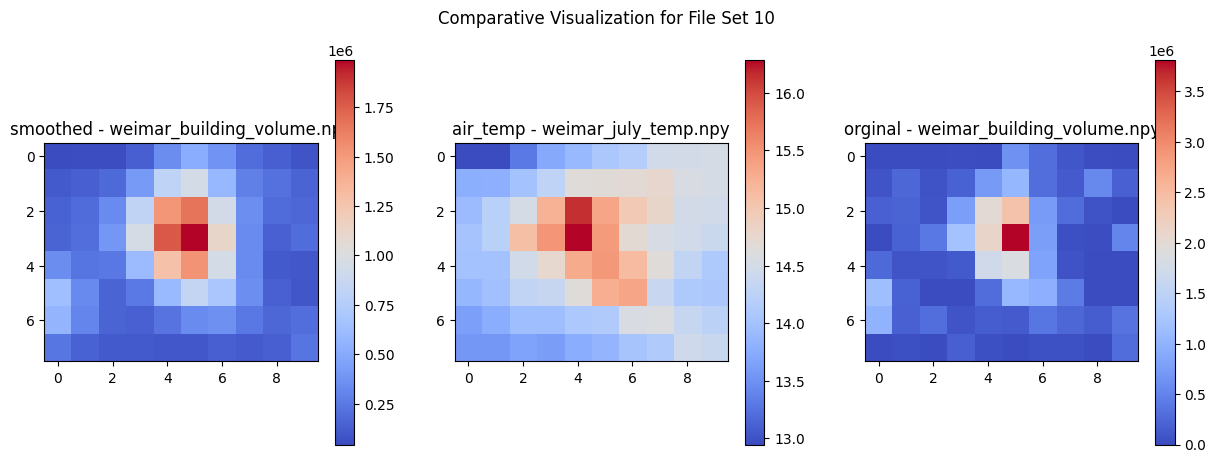

In [99]:
import numpy as np
import os
import matplotlib.pyplot as plt

def visualize_all_npy_files_from_folders(folder_paths):
    """
    Verilen klasörlerden her bir dosya için .npy dosyalarını yükler ve yan yana görselleştirir.
    
    Parametreler:
    - folder_paths (list): .npy dosyaları içeren klasörlerin yolları.
    """
    # Klasörlerden dosyaları sıralayarak al
    all_files = [sorted([f for f in os.listdir(folder) if f.endswith('.npy')]) for folder in folder_paths]
    
    # En az dosya sayısına göre döngü (eşit sayıda dosya varsayılarak)
    min_length = min(len(files) for files in all_files)
    
    for index in range(min_length):
        plt.figure(figsize=(15, 5))  # Yeni bir görsel için figure oluştur
        for i, folder in enumerate(folder_paths):
            file_path = os.path.join(folder, all_files[i][index])
            data = np.load(file_path)
            
            plt.subplot(1, len(folder_paths), i + 1)
            plt.imshow(data, cmap='coolwarm', interpolation='nearest')
            plt.colorbar()
            plt.title(f'{os.path.basename(folder)} - {all_files[i][index]}')
        
        plt.suptitle(f'Comparative Visualization for File Set {index + 1}')
        plt.show()

# Klasör yolları
folder_paths = [
    'C:/Users/bb26k/Desktop/weighting/smoothed',
    'C:/Users/bb26k/Desktop/weighting/air_temp',
    'C:/Users/bb26k/Desktop/weighting/orginal'
]

# Fonksiyonu çağır
visualize_all_npy_files_from_folders(folder_paths)

# CORRELATION BETWEEN THE BUILDING VOLUME AND TEMPERATURE DATA (GAUSSIAN BLURRED HAS HIGHER CORRELATION)

In [3]:
import numpy as np
import os

def calculate_correlations(data_folder):
    # Tüm şehir klasörlerini listele
    cities = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]
    correlations = {}

    # Her bir şehir için işlem yap
    for city in cities:
        city_folder = os.path.join(data_folder, city)
        
        # Dosya yollarını oluştur
        volume_path = os.path.join(city_folder, f'{city}_building_volume.npy')
        temp_path = os.path.join(city_folder, f'{city}_july_temp.npy')
        
        # Dosyaları yükle
        if os.path.exists(volume_path) and os.path.exists(temp_path):
            building_volume = np.load(volume_path)
            july_temp = np.load(temp_path)

            # Verileri düzleştir
            flat_volume = building_volume.flatten()
            flat_temp = july_temp.flatten()

            # Korelasyon hesapla
            correlation_matrix = np.corrcoef(flat_volume, flat_temp)
            correlation = correlation_matrix[0, 1]  # İki değişken arasındaki korelasyon katsayısını al

            # Sonuçları kaydet
            correlations[city] = correlation
        else:
            print(f"Missing data for city: {city}")

    return correlations

# Parametre
data_folder = 'C:/Users/bb26k/Desktop/ML_data'

# Korelasyonları hesapla
city_correlations = calculate_correlations(data_folder)

# Sonuçları yazdır
for city, correlation in city_correlations.items():
    print(f"Correlation between building volume and July temperature in {city}: {correlation:.4f}")


Correlation between building volume and July temperature in altenburg: 0.7805
Correlation between building volume and July temperature in erfurt: 0.8547
Correlation between building volume and July temperature in gera: 0.7600
Correlation between building volume and July temperature in gotha: 0.7182
Correlation between building volume and July temperature in jena: 0.7335
Correlation between building volume and July temperature in schmalkalden: 0.4843
Correlation between building volume and July temperature in sondershausen: 0.6262
Correlation between building volume and July temperature in sonneberg: 0.5330
Correlation between building volume and July temperature in suhl: 0.5251
Correlation between building volume and July temperature in weimar: 0.6708


In [100]:
import numpy as np
import os

def calculate_correlations(data_folder):
    # Tüm şehir klasörlerini listele
    cities = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]
    correlations = {}

    # Her bir şehir için işlem yap
    for city in cities:
        city_folder = os.path.join(data_folder, city)
        
        # Dosya yollarını oluştur
        volume_path = os.path.join(city_folder, f'{city}_building_volume.npy')
        temp_path = os.path.join(city_folder, f'{city}_july_temp.npy')
        
        # Dosyaları yükle
        if os.path.exists(volume_path) and os.path.exists(temp_path):
            building_volume = np.load(volume_path)
            july_temp = np.load(temp_path)

            # Verileri düzleştir
            flat_volume = building_volume.flatten()
            flat_temp = july_temp.flatten()

            # Korelasyon hesapla
            correlation_matrix = np.corrcoef(flat_volume, flat_temp)
            correlation = correlation_matrix[0, 1]  # İki değişken arasındaki korelasyon katsayısını al

            # Sonuçları kaydet
            correlations[city] = correlation
        else:
            print(f"Missing data for city: {city}")

    return correlations

# Parametre
data_folder = 'C:/Users/bb26k/Desktop/ML_data_smoothed'

# Korelasyonları hesapla
city_correlations = calculate_correlations(data_folder)

# Sonuçları yazdır
for city, correlation in city_correlations.items():
    print(f"Correlation between building volume and July temperature in {city}: {correlation:.4f}")

Correlation between building volume and July temperature in altenburg: 0.9355
Correlation between building volume and July temperature in erfurt: 0.9060
Correlation between building volume and July temperature in gera: 0.8770
Correlation between building volume and July temperature in gotha: 0.8309
Correlation between building volume and July temperature in jena: 0.8212
Correlation between building volume and July temperature in schmalkalden: 0.6592
Correlation between building volume and July temperature in sondershausen: 0.7113
Correlation between building volume and July temperature in sonneberg: 0.7410
Correlation between building volume and July temperature in suhl: 0.6647
Correlation between building volume and July temperature in weimar: 0.7701


# TRAINING THE MACHINE LEARNING MODEL

In [105]:
import numpy as np
import os
import random
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Veri yükleme ve düzenleme fonksiyonu
def load_data(city_name, folder='ML_data'):
    input_path = os.path.join(folder, city_name, f'{city_name}_building_volume.npy')
    output_path = os.path.join(folder, city_name, f'{city_name}_july_temp.npy')
    
    inputs = np.load(input_path)
    outputs = np.load(output_path)
    
    inputs_flat = inputs.flatten().reshape(-1, 1)
    outputs_flat = outputs.flatten()
    
    return inputs_flat, outputs_flat

# Veri artırma işlevi
def augment_data(inputs, outputs, n_samples=100, noise_level=0.01):
    # Gürültü ekleyerek veri artırma
    noise = np.random.normal(0, noise_level, inputs.shape)
    inputs_augmented = inputs + noise
    outputs_augmented = outputs  # Çıktılar için gürültü eklenmiyor

    # Veriyi tekrarlayarak çoğaltma
    inputs_repeated = np.tile(inputs_augmented, (n_samples, 1))
    outputs_repeated = np.tile(outputs_augmented, (n_samples,))

    return inputs_repeated, outputs_repeated

# Veri setini karıştır ve ayır
def split_data(cities, train_ratio=0.7):
    random.shuffle(cities)
    split_index = int(len(cities) * train_ratio)
    train_cities = cities[:split_index]
    test_cities = cities[split_index:]
    return train_cities, test_cities

# Modeli eğitme ve değerlendirme
def train_and_evaluate(train_inputs, train_outputs, test_inputs, test_outputs):
    #max_depth = 3, min_samples_split =4, min_samples;leaf =4
    #max_depth = 3, min_samples_split =5, min_samples;leaf =3
    model = RandomForestRegressor(n_estimators=100000, max_depth=3, min_samples_split=4, min_samples_leaf=2, max_features='sqrt')
    model.fit(train_inputs, train_outputs)
    
    predictions = model.predict(test_inputs)
    mse = mean_squared_error(test_outputs, predictions)
    print(f'Test MSE: {mse}')
    return model

# Ana fonksiyon
def main():
    data_folder = 'C:/Users/bb26k/Desktop/ML_data_smoothed'
    all_cities = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]
    train_cities, test_cities = split_data(all_cities, train_ratio=0.7)
    
    print("Training Cities:", train_cities)
    print("Testing Cities:", test_cities)
    
    train_inputs, train_outputs, test_inputs, test_outputs = [], [], [], []
    for city in train_cities:
        inputs, outputs = load_data(city, data_folder)
        inputs_augmented, outputs_augmented = augment_data(inputs, outputs, n_samples=3)
        train_inputs.append(inputs_augmented)
        train_outputs.append(outputs_augmented)
    
    for city in test_cities:
        inputs, outputs = load_data(city, data_folder)
        test_inputs.append(inputs)
        test_outputs.append(outputs)

    # Verileri birleştir
    train_inputs = np.vstack(train_inputs)
    train_outputs = np.hstack(train_outputs)
    test_inputs = np.vstack(test_inputs)
    test_outputs = np.hstack(test_outputs)
    
    model = train_and_evaluate(train_inputs, train_outputs, test_inputs, test_outputs)
    return model

if __name__ == '__main__':
    model = main()

Training Cities: ['jena', 'weimar', 'sondershausen', 'altenburg', 'gotha', 'schmalkalden', 'gera']
Testing Cities: ['erfurt', 'suhl', 'sonneberg']
Test MSE: 1.629931387383169


# PRECTION VISUALIZATIONS WITH TRAINED MODEL

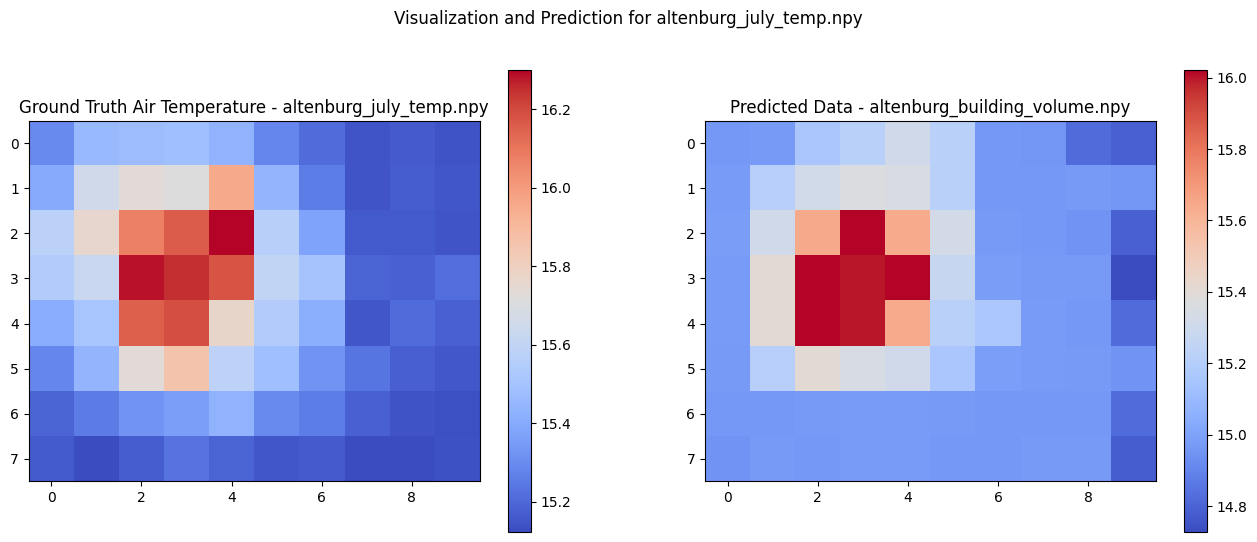

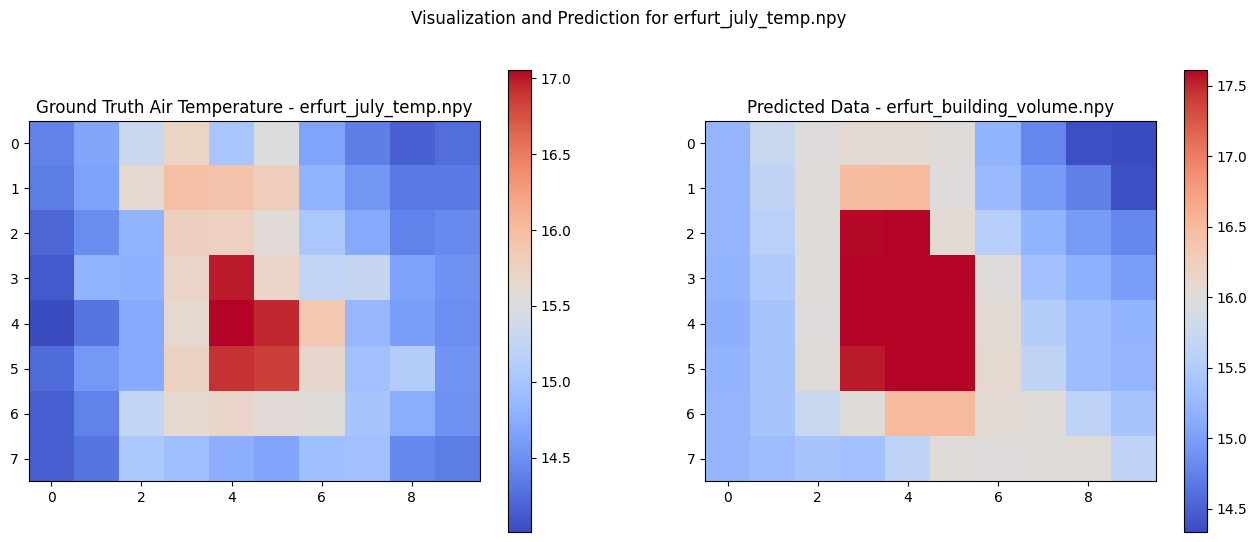

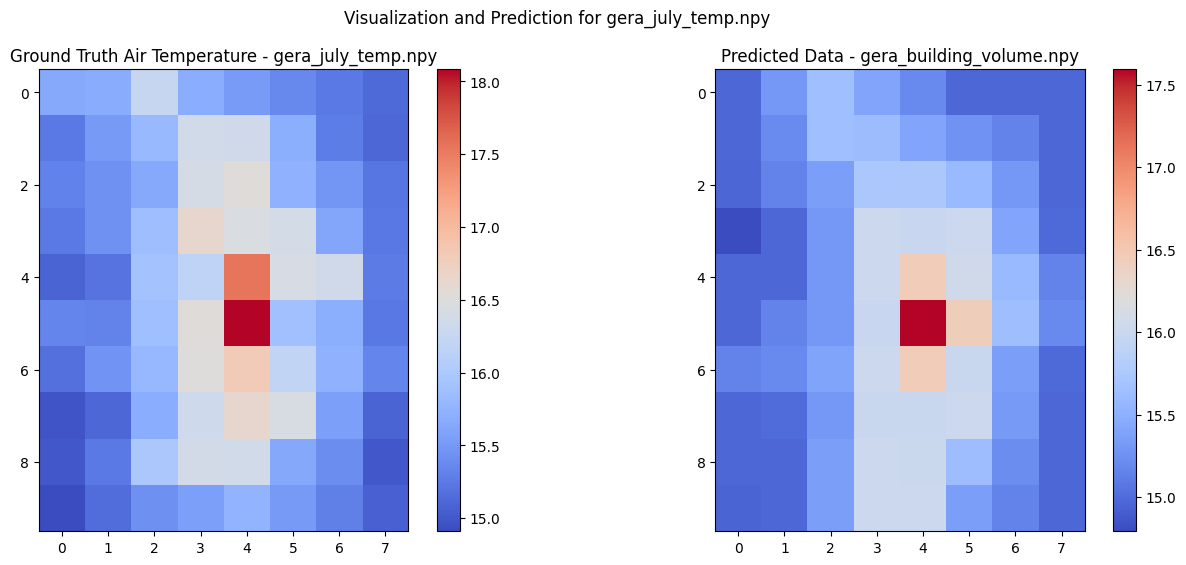

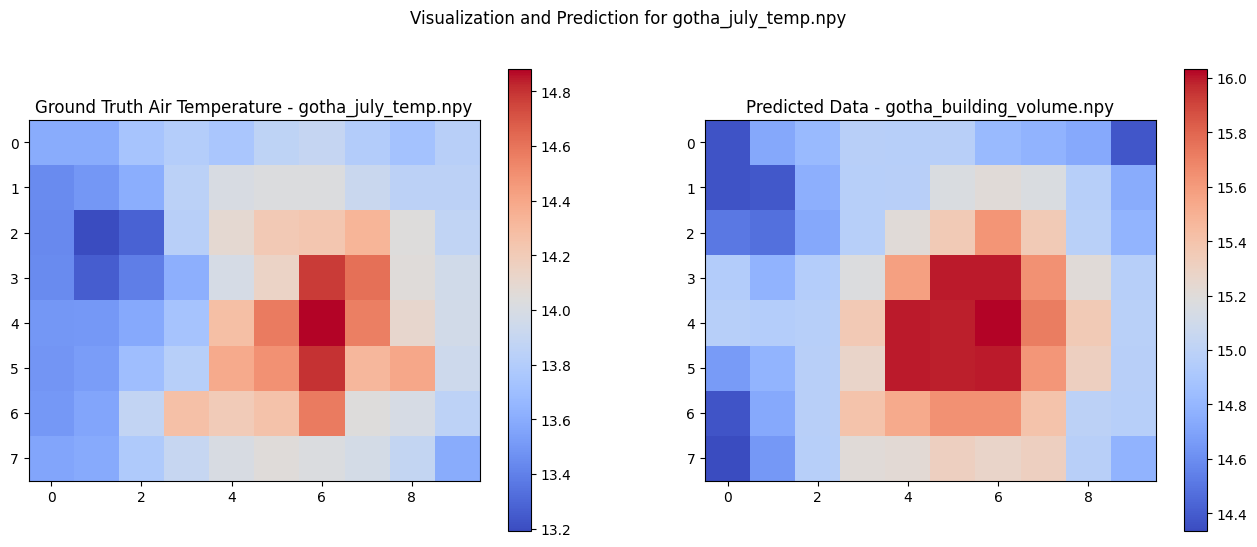

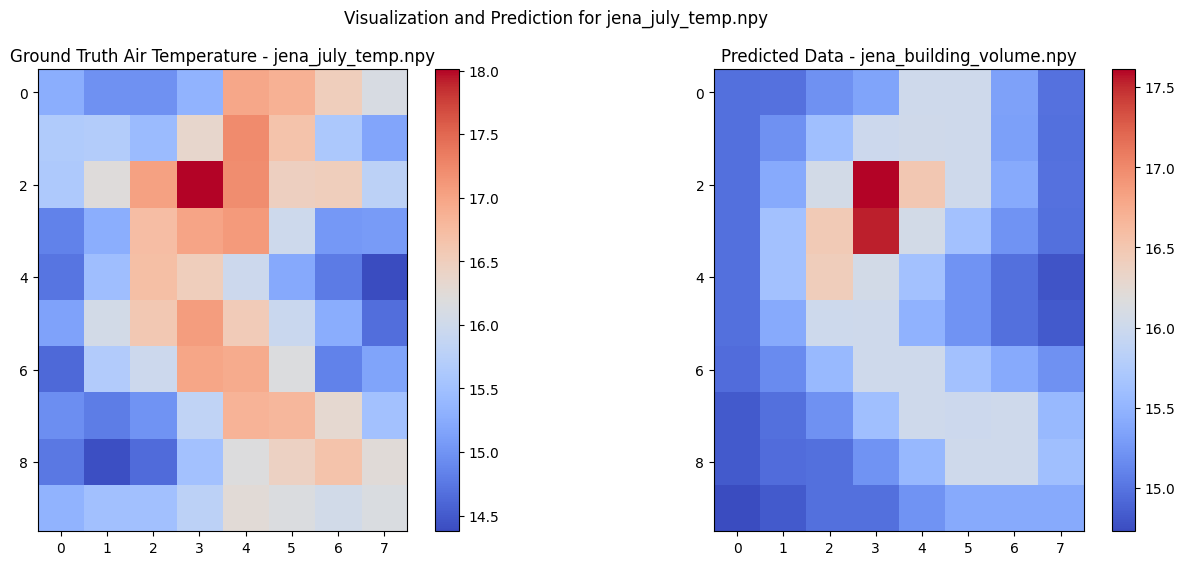

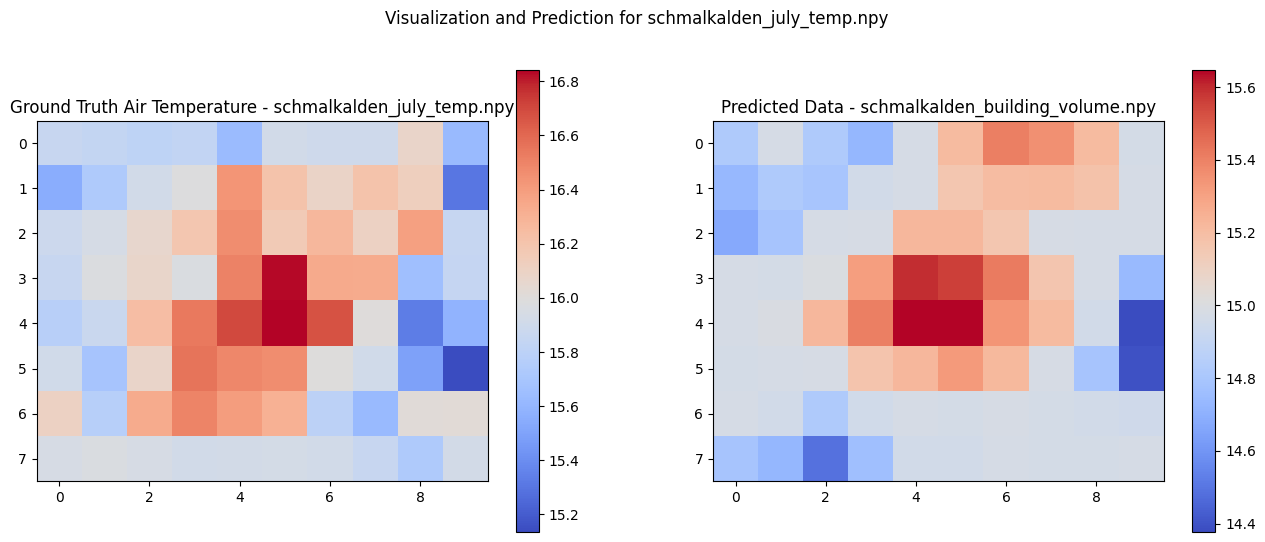

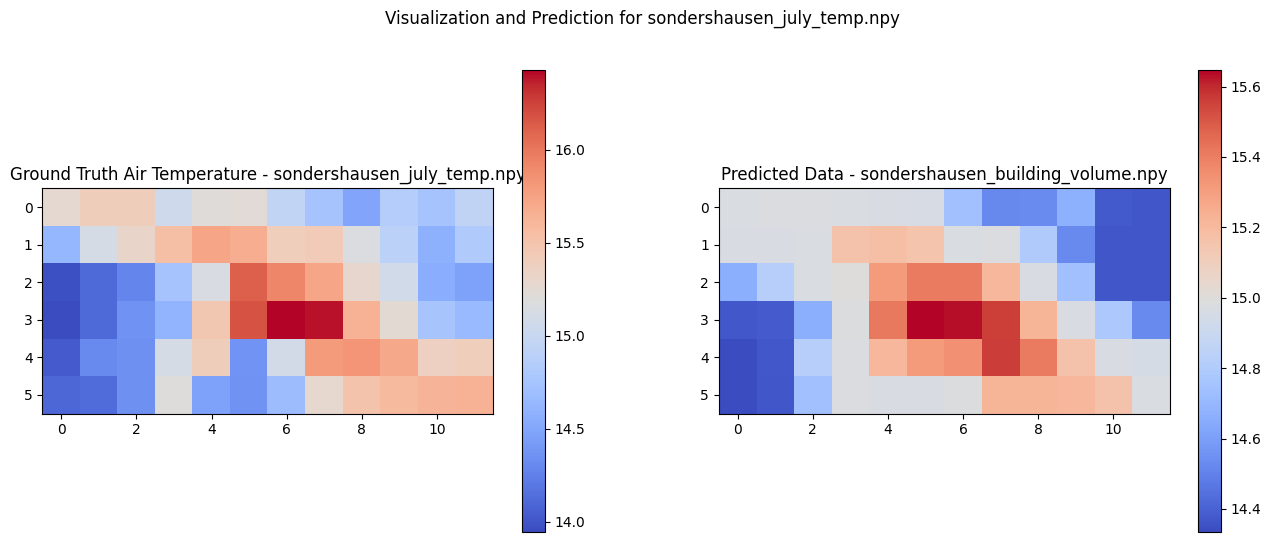

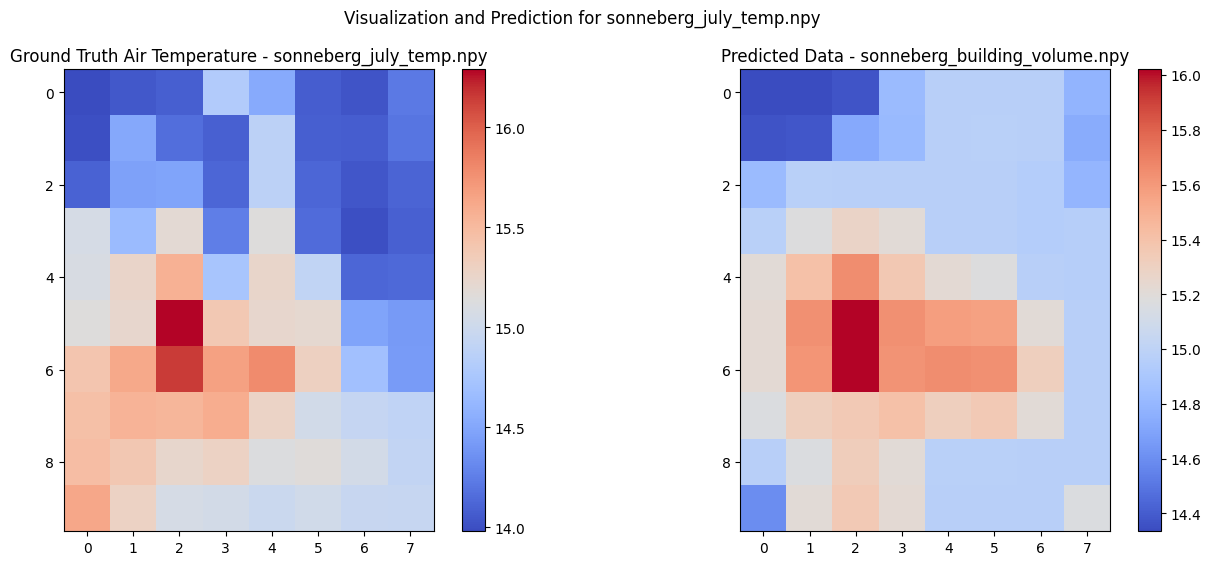

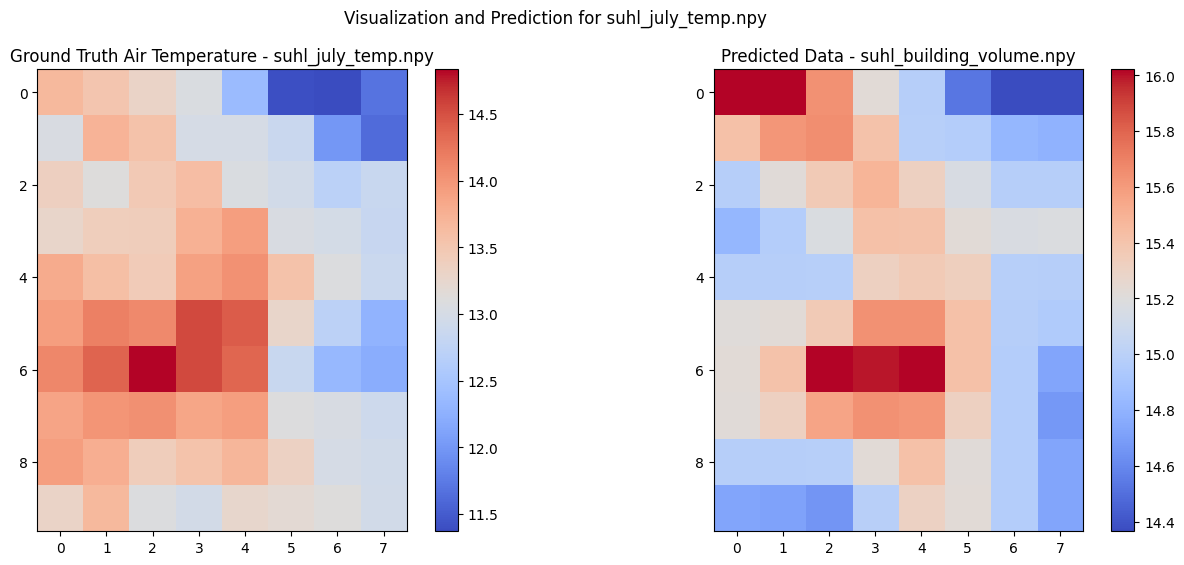

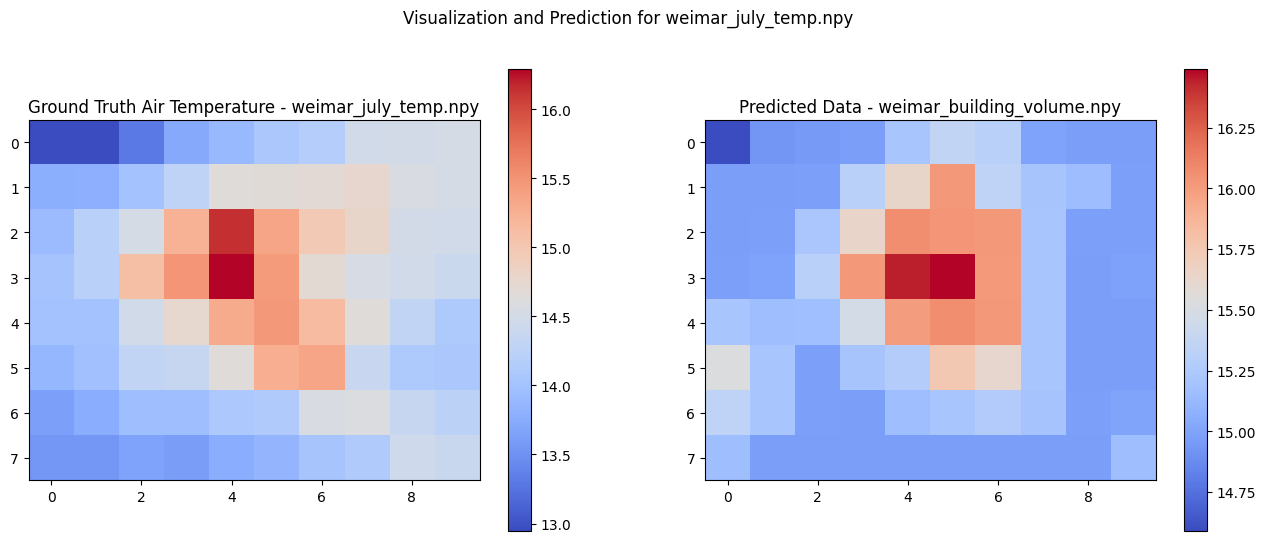

In [106]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression

def visualize_and_predict(input_folder, prediction_folder, model):
    """
    İki klasördeki .npy dosyalarını yükler, birinde tahmin yapar ve yan yana görselleştirir.
    
    Parametreler:
    - input_folder (str): Doğrudan görselleştirilecek dosyaların bulunduğu klasör.
    - prediction_folder (str): Model kullanılarak tahmin yapılacak dosyaların bulunduğu klasör.
    - model (RandomForestRegressor): Tahmin için kullanılacak model.
    """
    # İki klasörden dosyaları listele
    input_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.npy')])
    prediction_files = sorted([f for f in os.listdir(prediction_folder) if f.endswith('.npy')])
    
    # Dosyaların eşleştirilmesi ve görselleştirilmesi
    for input_file, prediction_file in zip(input_files, prediction_files):
        # Input dosyasını yükle ve görselleştir
        input_path = os.path.join(input_folder, input_file)
        input_data = np.load(input_path)
        
        plt.figure(figsize=(16, 6))
        
        plt.subplot(1, 2, 1)
        plt.imshow(input_data, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Ground Truth Air Temperature - {input_file}')
        
        # Prediction dosyasını yükle, tahmin yap ve görselleştir
        prediction_path = os.path.join(prediction_folder, prediction_file)
        prediction_data = np.load(prediction_path)
        prediction_data_flat = prediction_data.flatten().reshape(-1, 1)
        prediction = model.predict(prediction_data_flat)
        prediction_reshaped = prediction.reshape(prediction_data.shape)
        
        plt.subplot(1, 2, 2)
        plt.imshow(prediction_reshaped, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Predicted Data - {prediction_file}')
        
        plt.suptitle(f'Visualization and Prediction for {input_file}')
        plt.show()

# RandomForestRegressor modeli önceden eğitilmeli
# Örnek bir basit model yüklemesi

# Klasör yolları
input_folder = 'C:/Users/bb26k/Desktop/weighting/air_temp'
prediction_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Fonksiyonu çağır
visualize_and_predict(input_folder, prediction_folder, model)


In [107]:
model2 = model
print(model)
print(model2)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=100000)
RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=100000)


In [108]:
from joblib import dump

def save_model(model, filename='model.joblib'):
    dump(model, filename)
    print(f'Model succesfully {filename} saved.')
    
save_model(model, 'model.joblib')

Model succesfully model.joblib saved.


In [8]:
from joblib import load
model3 = load('C:/Users/bb26k/Desktop/model.joblib')
print(model3)

RandomForestRegressor(max_depth=3, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4, n_estimators=100000)


# MSE Calculation with the all (test+train) data

In [9]:
import os
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_total_mse(input_folder, prediction_folder, model):
    """
    İki klasördeki .npy dosyalarını yükler, birinde tahmin yapar ve tüm dosyalar için tek bir toplu MSE'yi hesaplar.
    
    Parametreler:
    - input_folder (str): Gerçek verilerin bulunduğu klasör.
    - prediction_folder (str): Model kullanılarak tahmin yapılacak dosyaların bulunduğu klasör.
    - model: Tahmin için kullanılacak model.
    """
    # İki klasörden dosyaları listele
    input_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.npy')])
    prediction_files = sorted([f for f in os.listdir(prediction_folder) if f.endswith('.npy')])
    
    all_true = []  # Tüm gerçek verileri saklamak için
    all_predictions = []  # Tüm tahminleri saklamak için
    
    # Dosyaların eşleştirilmesi ve MSE hesaplaması
    for input_file, prediction_file in zip(input_files, prediction_files):
        # Gerçek veriyi yükle
        input_path = os.path.join(input_folder, input_file)
        input_data = np.load(input_path)
        
        # Tahmin yapılacak veriyi yükle ve modelle tahmin yap
        prediction_path = os.path.join(prediction_folder, prediction_file)
        prediction_data = np.load(prediction_path)
        prediction_data_flat = prediction_data.flatten().reshape(-1, 1)
        prediction = model.predict(prediction_data_flat)
        prediction_reshaped = prediction.reshape(prediction_data.shape)
        
        # Gerçek ve tahmin değerlerini toplu listeye ekle
        all_true.extend(input_data.flatten())
        all_predictions.extend(prediction_reshaped.flatten())
    
    # Toplu MSE hesaplama ve yazdırma
    total_mse = mean_squared_error(all_true, all_predictions)
    print(f'Total MSE across all files: {total_mse}')

# Modeli yükle (Örneğin model4 olarak atanmış)
# Burada daha önce eğitim yapılmış bir model olmalıdır.

# Klasör yolları
input_folder = 'C:/Users/bb26k/Desktop/weighting/air_temp'
prediction_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Fonksiyonu çağır ve MSE hesapla
calculate_total_mse(input_folder, prediction_folder, model3)

Total MSE across all files: 0.9240508370895554


# PREDICT AND VISUALIZE (INCLUDE MIN-MAX VALUES, ERROR MAPS, SSIM AND LPIPS METRICS) FOR RANDOM FOREST

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
Loading model from: C:\Users\bb26k\Anaconda3\lib\site-packages\lpips\weights\v0.1\alex.pth
Ground Truth Data - altenburg_july_temp.npy: Min = 15.122580645161293, Max = 16.3
Predicted Data - altenburg_building_volume.npy: Min = 14.728261115944395, Max = 16.021139726700532
PSNR for altenburg_july_temp.npy: 11.395361363554706
SSIM for altenburg_july_temp.npy: 0.8975057677668484
LPIPS for altenburg_july_temp.npy: 5.993926606606692e-06


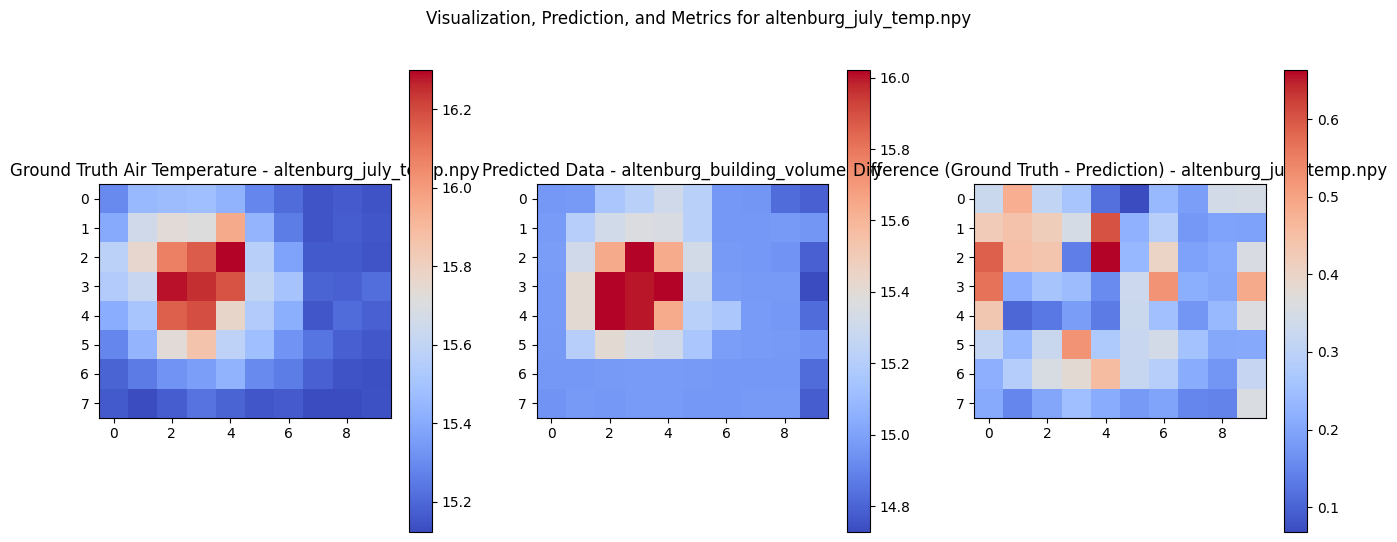

Ground Truth Data - erfurt_july_temp.npy: Min = 14.009677419354837, Max = 17.054838709677416
Predicted Data - erfurt_building_volume.npy: Min = 14.334645977686192, Max = 17.61152787001085
PSNR for erfurt_july_temp.npy: 10.387284299054473
SSIM for erfurt_july_temp.npy: 0.822608995639763
LPIPS for erfurt_july_temp.npy: 5.0394548452459276e-05


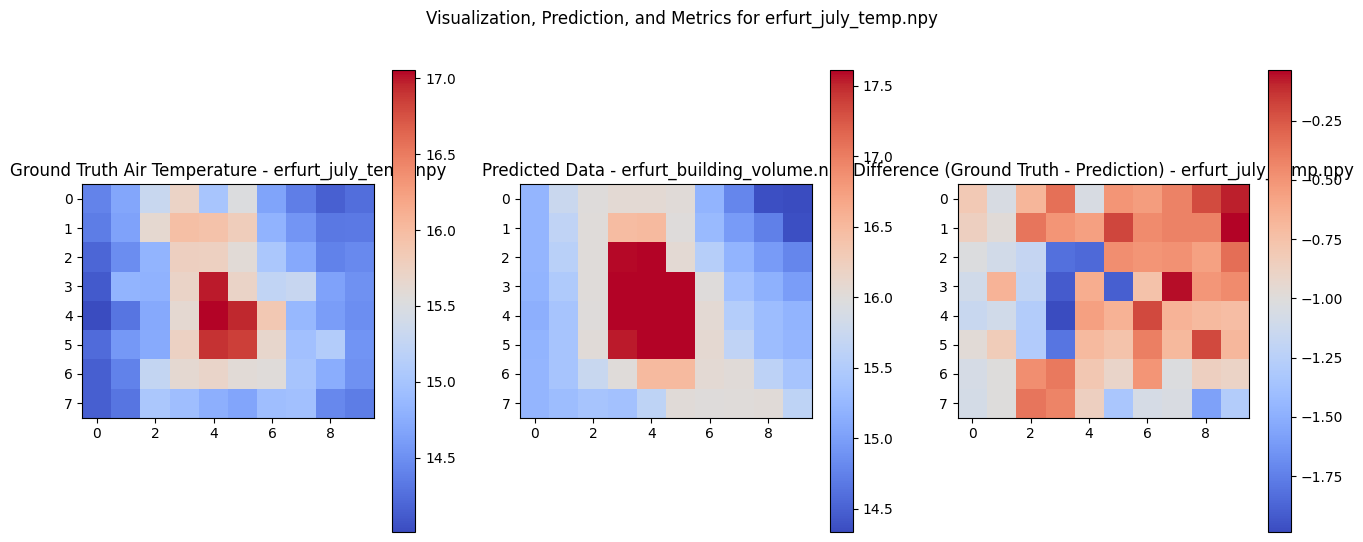

Ground Truth Data - gera_july_temp.npy: Min = 14.909677419354841, Max = 18.08387096774194
Predicted Data - gera_building_volume.npy: Min = 14.793277813938328, Max = 17.592884825556375
PSNR for gera_july_temp.npy: 18.00715048482501
SSIM for gera_july_temp.npy: 0.8872939129968392
LPIPS for gera_july_temp.npy: 3.777909660129808e-05


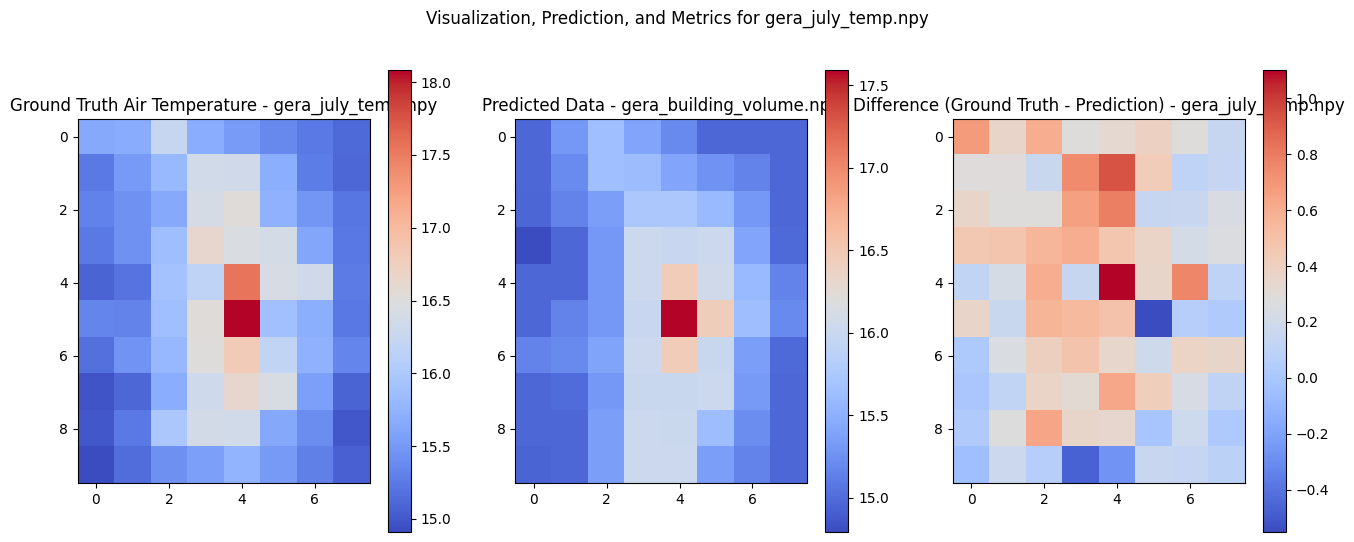

Ground Truth Data - gotha_july_temp.npy: Min = 13.190322580645162, Max = 14.880645161290325
Predicted Data - gotha_building_volume.npy: Min = 14.334657607445566, Max = 16.031989975796353
PSNR for gotha_july_temp.npy: 2.8546493312446146
SSIM for gotha_july_temp.npy: 0.8039999149738962
LPIPS for gotha_july_temp.npy: 4.7899990022415295e-05


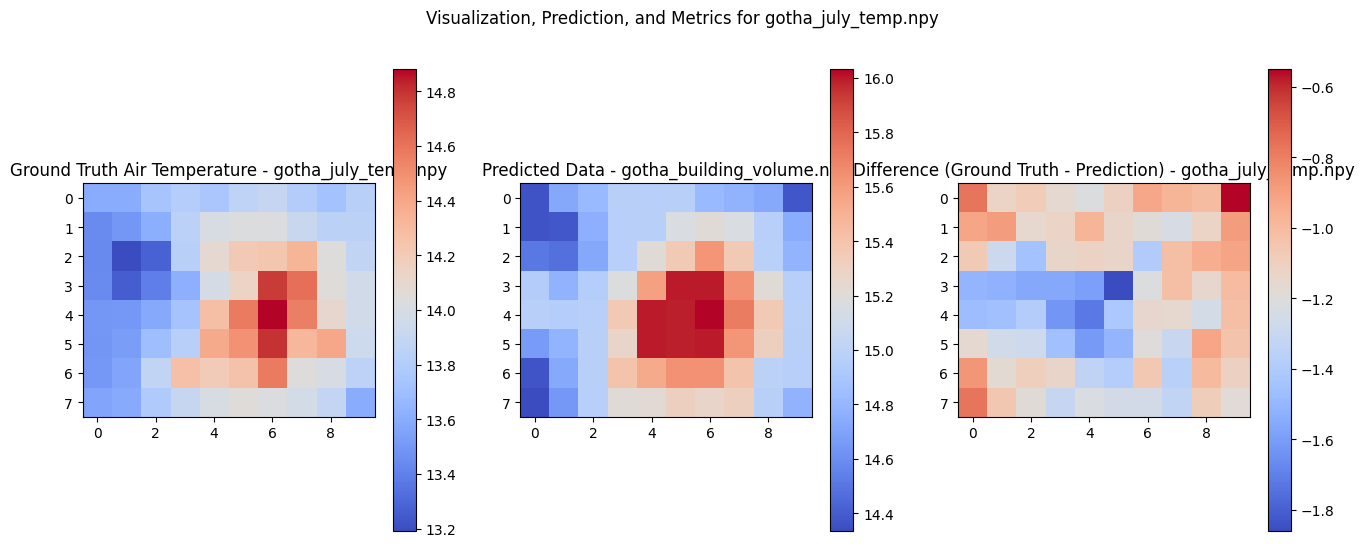

Ground Truth Data - jena_july_temp.npy: Min = 14.377419354838707, Max = 18.00967741935484
Predicted Data - jena_building_volume.npy: Min = 14.728867498382835, Max = 17.61152787001085
PSNR for jena_july_temp.npy: 15.657337365024915
SSIM for jena_july_temp.npy: 0.7767370533946933
LPIPS for jena_july_temp.npy: 0.0001453180448152125


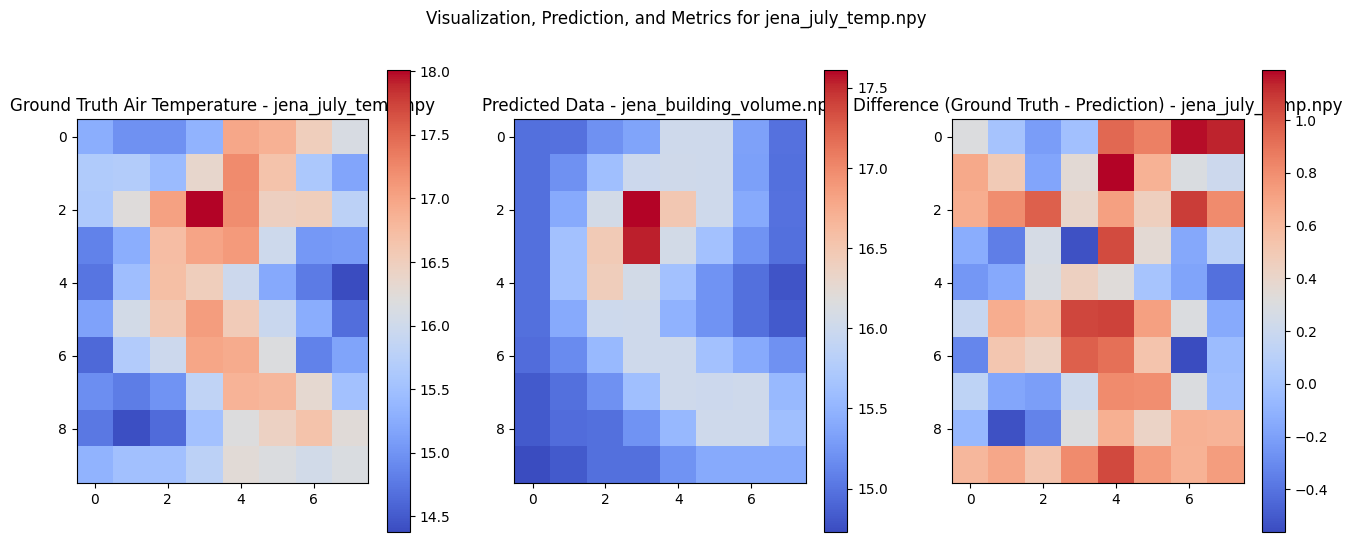

Ground Truth Data - schmalkalden_july_temp.npy: Min = 15.135483870967743, Max = 16.84193548387097
Predicted Data - schmalkalden_building_volume.npy: Min = 14.376884939795309, Max = 15.647149382655124
PSNR for schmalkalden_july_temp.npy: 4.398354722333403
SSIM for schmalkalden_july_temp.npy: 0.6996070836591377
LPIPS for schmalkalden_july_temp.npy: 4.79561131214723e-05


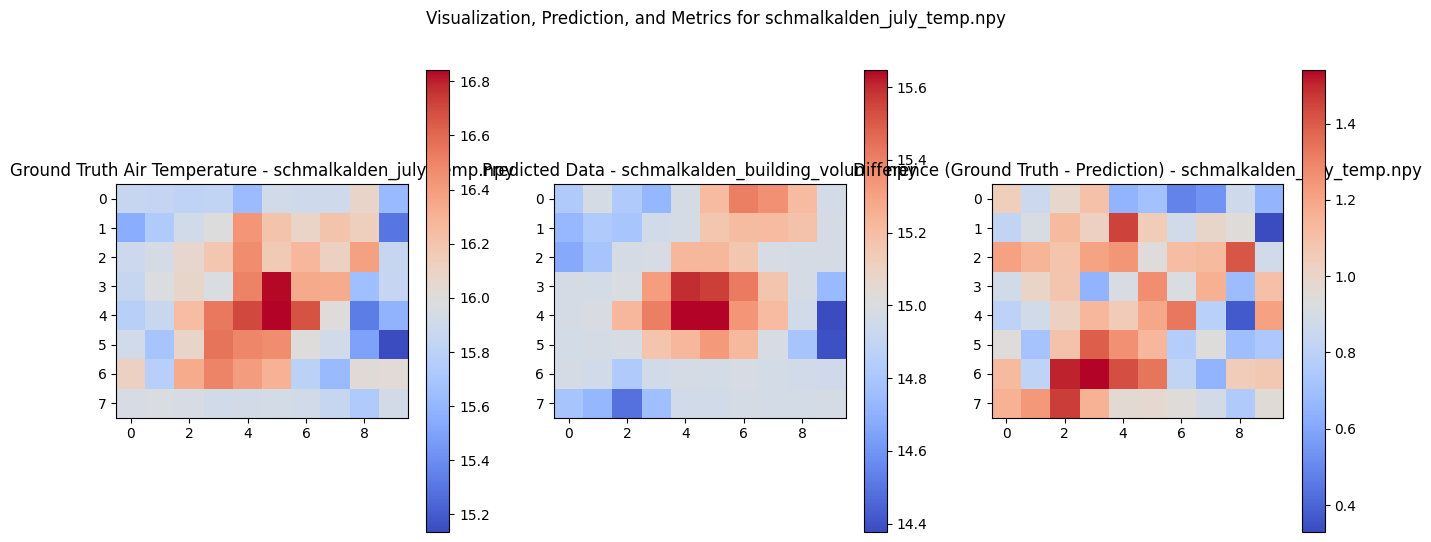

Ground Truth Data - sondershausen_july_temp.npy: Min = 13.94516129032258, Max = 16.429032258064517
Predicted Data - sondershausen_building_volume.npy: Min = 14.334645977686192, Max = 15.647149382655124
PSNR for sondershausen_july_temp.npy: 15.559696659880856
SSIM for sondershausen_july_temp.npy: 0.6618129327766553
LPIPS for sondershausen_july_temp.npy: 0.00018181288032792509


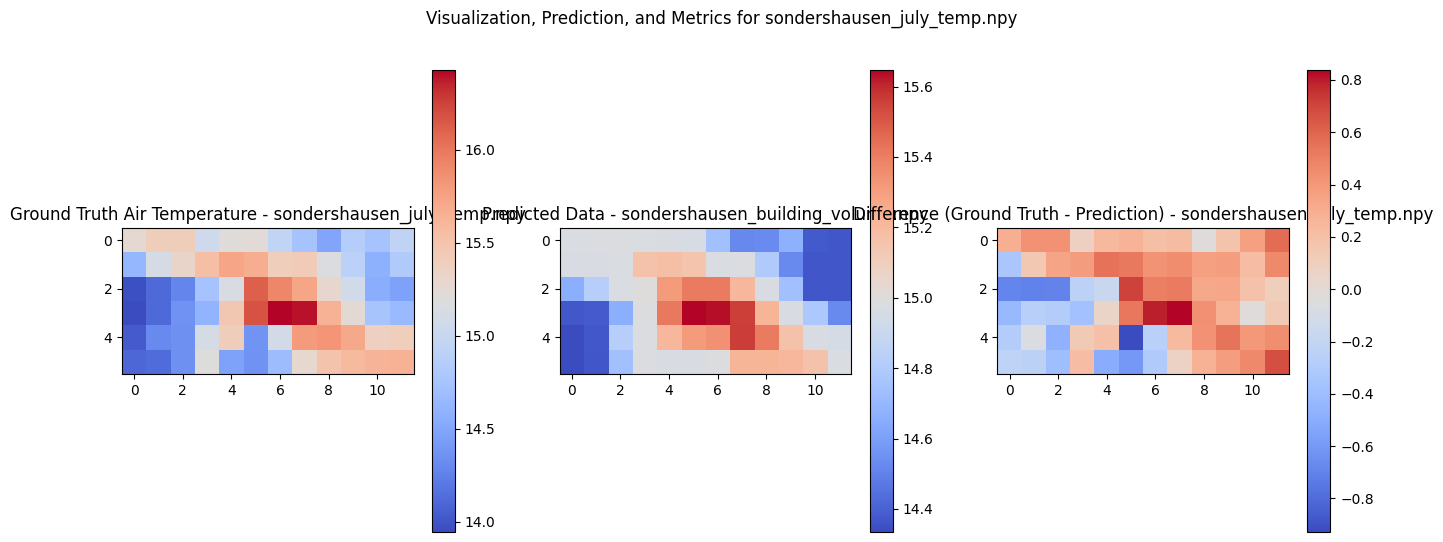

Ground Truth Data - sonneberg_july_temp.npy: Min = 13.980645161290324, Max = 16.290322580645164
Predicted Data - sonneberg_building_volume.npy: Min = 14.334645977686192, Max = 16.021592319374875
PSNR for sonneberg_july_temp.npy: 13.545347715833774
SSIM for sonneberg_july_temp.npy: 0.6533304156128769
LPIPS for sonneberg_july_temp.npy: 0.00010684962035156786


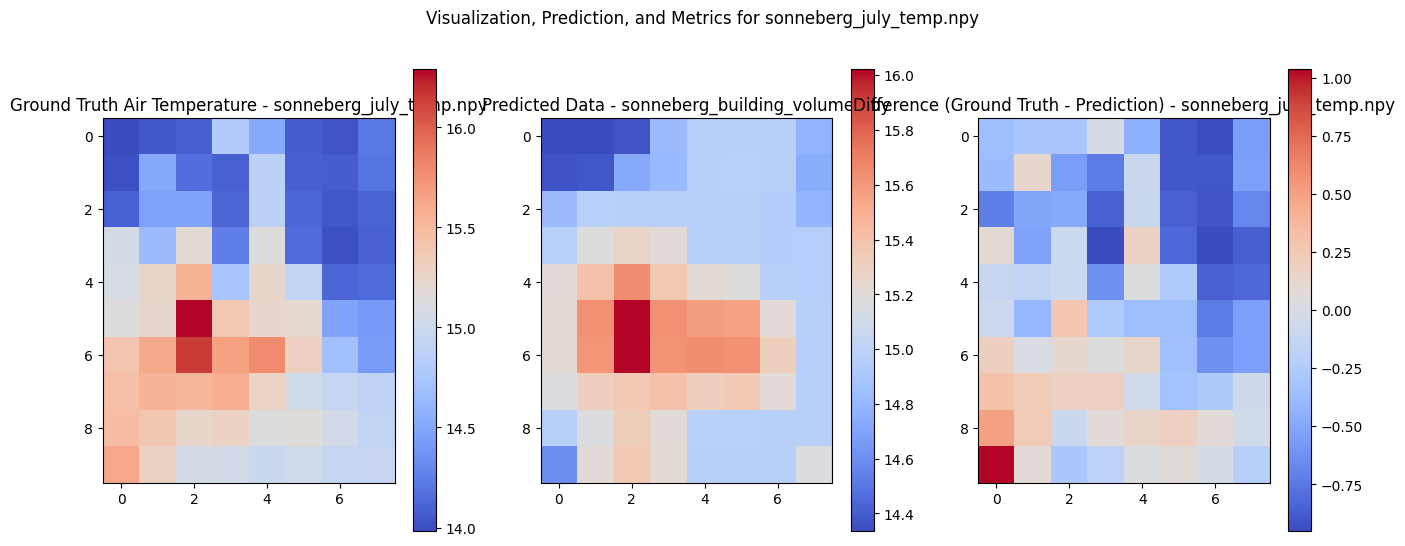

Ground Truth Data - suhl_july_temp.npy: Min = 11.370967741935484, Max = 14.83548387096774
Predicted Data - suhl_building_volume.npy: Min = 14.365170585585195, Max = 16.021530850494276
PSNR for suhl_july_temp.npy: 4.988400128809458
SSIM for suhl_july_temp.npy: 0.6210333999195227
LPIPS for suhl_july_temp.npy: 0.00019183068070560694


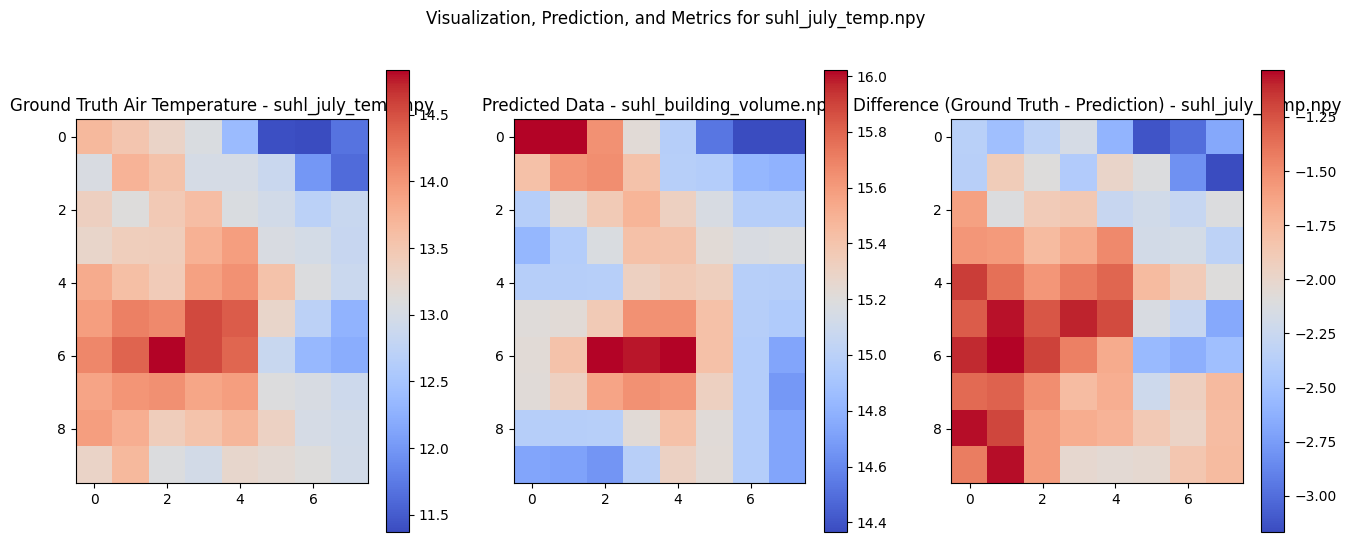

Ground Truth Data - weimar_july_temp.npy: Min = 12.94516129032258, Max = 16.29032258064516
Predicted Data - weimar_building_volume.npy: Min = 14.589323691359471, Max = 16.49068262943699
PSNR for weimar_july_temp.npy: 10.724922444953656
SSIM for weimar_july_temp.npy: 0.8004883261928505
LPIPS for weimar_july_temp.npy: 9.241619409294799e-05


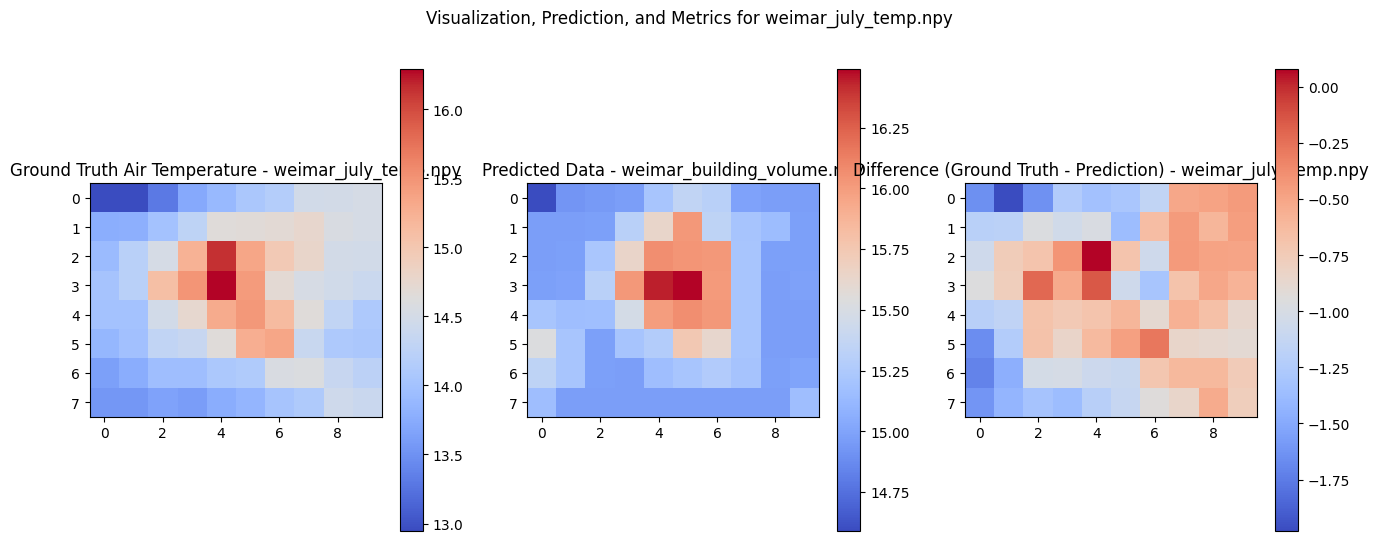

In [8]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import lpips
import torch
import cv2

def calculate_psnr(gt_image, pred_image):
    return psnr(gt_image, pred_image, data_range=gt_image.max() - gt_image.min())

def calculate_ssim(gt_image, pred_image):
    return ssim(gt_image, pred_image, data_range=gt_image.max() - gt_image.min(), multichannel=True,win_size=5)

def calculate_lpips(gt_image, pred_image, model):
    # Ensure images are of a standard size, e.g., 64x64
    gt_image_resized = cv2.resize(gt_image, (64, 64))
    pred_image_resized = cv2.resize(pred_image, (64, 64))
    
    # Ensure the images are 3D
    if len(gt_image_resized.shape) == 2:
        gt_image_resized = np.expand_dims(gt_image_resized, axis=-1)
    if len(pred_image_resized.shape) == 2:
        pred_image_resized = np.expand_dims(pred_image_resized, axis=-1)

    # Convert to tensors
    gt_image_tensor = torch.tensor(gt_image_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    pred_image_tensor = torch.tensor(pred_image_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    
    # Compute LPIPS score
    lpips_score = model(gt_image_tensor, pred_image_tensor)
    return lpips_score.item()



def visualize_and_predict(input_folder, prediction_folder, model):
    """
    Loads .npy files from two folders, performs predictions on one set, and visualizes them side by side.
    Additionally, calculates LPIPS, SSIM, and PSNR metrics for each pair of images.
    
    Parameters:
    - input_folder (str): Folder containing ground truth data.
    - prediction_folder (str): Folder containing data to predict.
    - model (RandomForestRegressor): Model used for predictions.
    """
    # Initialize LPIPS model
    lpips_model = lpips.LPIPS(net='alex')

    # List files in both directories
    input_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.npy')])
    prediction_files = sorted([f for f in os.listdir(prediction_folder) if f.endswith('.npy')])
    
    # Iterate through the files
    for input_file, prediction_file in zip(input_files, prediction_files):
        # Load ground truth data
        input_path = os.path.join(input_folder, input_file)
        input_data = np.load(input_path)
        
        # Display min and max values for ground truth
        input_min, input_max = np.min(input_data), np.max(input_data)
        print(f'Ground Truth Data - {input_file}: Min = {input_min}, Max = {input_max}')
        
        plt.figure(figsize=(16, 6))
        
        plt.subplot(1, 3, 1)
        plt.imshow(input_data, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Ground Truth Air Temperature - {input_file}')
        
        # Load prediction data and make prediction
        prediction_path = os.path.join(prediction_folder, prediction_file)
        prediction_data = np.load(prediction_path)
        prediction_data_flat = prediction_data.flatten().reshape(-1, 1)
        prediction = model.predict(prediction_data_flat)
        prediction_reshaped = prediction.reshape(prediction_data.shape)
        
        # Display min and max values for predicted data
        prediction_min, prediction_max = np.min(prediction_reshaped), np.max(prediction_reshaped)
        print(f'Predicted Data - {prediction_file}: Min = {prediction_min}, Max = {prediction_max}')
        
        plt.subplot(1, 3, 2)
        plt.imshow(prediction_reshaped, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Predicted Data - {prediction_file}')
        
        # Resize images if needed (to ensure same size)
        if input_data.shape != prediction_reshaped.shape:
            prediction_reshaped = cv2.resize(prediction_reshaped, (input_data.shape[1], input_data.shape[0]))
        
        # Calculate PSNR
        psnr_value = calculate_psnr(input_data, prediction_reshaped)
        print(f"PSNR for {input_file}: {psnr_value}")
        
        # Calculate SSIM
        ssim_value = calculate_ssim(input_data, prediction_reshaped)
        print(f"SSIM for {input_file}: {ssim_value}")
        
        # Calculate LPIPS
        lpips_value = calculate_lpips(input_data, prediction_reshaped, lpips_model)
        print(f"LPIPS for {input_file}: {lpips_value}")
        
        # Plot difference between ground truth and prediction
        difference = input_data - prediction_reshaped
        plt.subplot(1, 3, 3)
        plt.imshow(difference, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Difference (Ground Truth - Prediction) - {input_file}')
        
        plt.suptitle(f'Visualization, Prediction, and Metrics for {input_file}')
        plt.show()

# Example paths and model initialization (replace with actual model)
input_folder = 'C:/Users/bb26k/Desktop/weighting/air_temp'
prediction_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Call the function (model must be properly defined and trained beforehand)
visualize_and_predict(input_folder, prediction_folder, model3)


# EXTREME GRADIENT BOOSTING

In [118]:
import numpy as np
import os
import random
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Veri yükleme ve düzenleme fonksiyonu
def load_data(city_name, folder='ML_data'):
    input_path = os.path.join(folder, city_name, f'{city_name}_building_volume.npy')
    output_path = os.path.join(folder, city_name, f'{city_name}_july_temp.npy')
    
    inputs = np.load(input_path)
    outputs = np.load(output_path)
    
    inputs_flat = inputs.flatten().reshape(-1, 1)
    outputs_flat = outputs.flatten()
    
    return inputs_flat, outputs_flat

# Veri artırma işlevi
def augment_data(inputs, outputs, n_samples=100, noise_level=0.01):
    noise = np.random.normal(0, noise_level, inputs.shape)
    inputs_augmented = inputs + noise
    outputs_augmented = outputs  # Çıktılar için gürültü eklenmiyor

    inputs_repeated = np.tile(inputs_augmented, (n_samples, 1))
    outputs_repeated = np.tile(outputs_augmented, (n_samples,))

    return inputs_repeated, outputs_repeated

# Veri setini karıştır ve ayır
def split_data(cities, train_ratio=0.7):
    random.shuffle(cities)
    split_index = int(len(cities) * train_ratio)
    train_cities = cities[:split_index]
    test_cities = cities[split_index:]
    return train_cities, test_cities

# Modeli eğitme ve değerlendirme
def train_and_evaluate(train_inputs, train_outputs, test_inputs, test_outputs):
    #model = XGBRegressor(n_estimators=200000, max_depth=3, learning_rate=0.00001) #also min_child_weight = 0.75 might be good
    
    #model = XGBRegressor(n_estimators=300000, max_depth=3, learning_rate=0.000003, min_child_weight = 0.5, tree_method = 'exact') #using device = 'cuda' makes it slower
    model = XGBRegressor(n_estimators=300000, max_depth=3, learning_rate=0.000003) 
    model.fit(train_inputs, train_outputs)
    
    predictions = model.predict(test_inputs)
    mse = mean_squared_error(test_outputs, predictions)
    print(f'Test MSE: {mse}')
    return model

# Ana fonksiyon
def main():
    data_folder = 'C:/Users/bb26k/Desktop/ML_data_smoothed'
    all_cities = [d for d in os.listdir(data_folder) if os.path.isdir(os.path.join(data_folder, d))]
    train_cities, test_cities = split_data(all_cities, train_ratio=0.7)
    
    print("Training Cities:", train_cities)
    print("Testing Cities:", test_cities)
    
    train_inputs, train_outputs, test_inputs, test_outputs = [], [], [], []
    for city in train_cities:
        inputs, outputs = load_data(city, data_folder)
        inputs_augmented, outputs_augmented = augment_data(inputs, outputs, n_samples=3)
        train_inputs.append(inputs_augmented)
        train_outputs.append(outputs_augmented)
    
    for city in test_cities:
        inputs, outputs = load_data(city, data_folder)
        test_inputs.append(inputs)
        test_outputs.append(outputs)

    train_inputs = np.vstack(train_inputs)
    train_outputs = np.hstack(train_outputs)
    test_inputs = np.vstack(test_inputs)
    test_outputs = np.hstack(test_outputs)
    
    model = train_and_evaluate(train_inputs, train_outputs, test_inputs, test_outputs)
    return model

if __name__ == '__main__':
    model = main()


Training Cities: ['jena', 'sonneberg', 'weimar', 'altenburg', 'gotha', 'gera', 'suhl']
Testing Cities: ['sondershausen', 'schmalkalden', 'erfurt']
Test MSE: 0.9575383561303056


In [98]:
#RMSE 0.26
from joblib import dump

def save_model(model, filename='model_xgb.joblib'):
    dump(model, filename)
    print(f'Model succesfully {filename} saved.')
    
save_model(model, 'model_xgb.joblib')

Model succesfully model_xgb.joblib saved.


In [3]:
from joblib import load
model4 = load('C:/Users/bb26k/Desktop/model_xgb.joblib')
print(model4)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=3e-06, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


# MSE Calculation over all data

In [7]:
import os
import numpy as np
from sklearn.metrics import mean_squared_error

def calculate_total_mse(input_folder, prediction_folder, model):
    """
    İki klasördeki .npy dosyalarını yükler, birinde tahmin yapar ve tüm dosyalar için tek bir toplu MSE'yi hesaplar.
    
    Parametreler:
    - input_folder (str): Gerçek verilerin bulunduğu klasör.
    - prediction_folder (str): Model kullanılarak tahmin yapılacak dosyaların bulunduğu klasör.
    - model: Tahmin için kullanılacak model.
    """
    # İki klasörden dosyaları listele
    input_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.npy')])
    prediction_files = sorted([f for f in os.listdir(prediction_folder) if f.endswith('.npy')])
    
    all_true = []  # Tüm gerçek verileri saklamak için
    all_predictions = []  # Tüm tahminleri saklamak için
    
    # Dosyaların eşleştirilmesi ve MSE hesaplaması
    for input_file, prediction_file in zip(input_files, prediction_files):
        # Gerçek veriyi yükle
        input_path = os.path.join(input_folder, input_file)
        input_data = np.load(input_path)
        
        # Tahmin yapılacak veriyi yükle ve modelle tahmin yap
        prediction_path = os.path.join(prediction_folder, prediction_file)
        prediction_data = np.load(prediction_path)
        prediction_data_flat = prediction_data.flatten().reshape(-1, 1)
        prediction = model.predict(prediction_data_flat)
        prediction_reshaped = prediction.reshape(prediction_data.shape)
        
        # Gerçek ve tahmin değerlerini toplu listeye ekle
        all_true.extend(input_data.flatten())
        all_predictions.extend(prediction_reshaped.flatten())
    
    # Toplu MSE hesaplama ve yazdırma
    total_mse = mean_squared_error(all_true, all_predictions)
    print(f'Total MSE across all files: {total_mse}')

# Modeli yükle (Örneğin model4 olarak atanmış)
# Burada daha önce eğitim yapılmış bir model olmalıdır.

# Klasör yolları
input_folder = 'C:/Users/bb26k/Desktop/weighting/air_temp'
prediction_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Fonksiyonu çağır ve MSE hesapla
calculate_total_mse(input_folder, prediction_folder, model4)




Total MSE across all files: 0.8437914031854724


# PREDICT AND VISUALIZE (INCLUDE MIN-MAX VALUES, ERROR MAPS, SSIM AND LPIPS METRICS) FOR XGBOOST

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


C:\Users\bb26k\Anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\bb26k\Anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: C:\Users\bb26k\Anaconda3\lib\site-packages\lpips\weights\v0.1\alex.pth
Ground Truth Data - altenburg_july_temp.npy: Min = 15.122580645161293, Max = 16.3
Predicted Data - altenburg_building_volume.npy: Min = 14.581095695495605, Max = 15.436975479125977
PSNR for altenburg_july_temp.npy: 6.026499065276259
SSIM for altenburg_july_temp.npy: 0.7452451401739729
LPIPS for altenburg_july_temp.npy: 1.832668567658402e-05


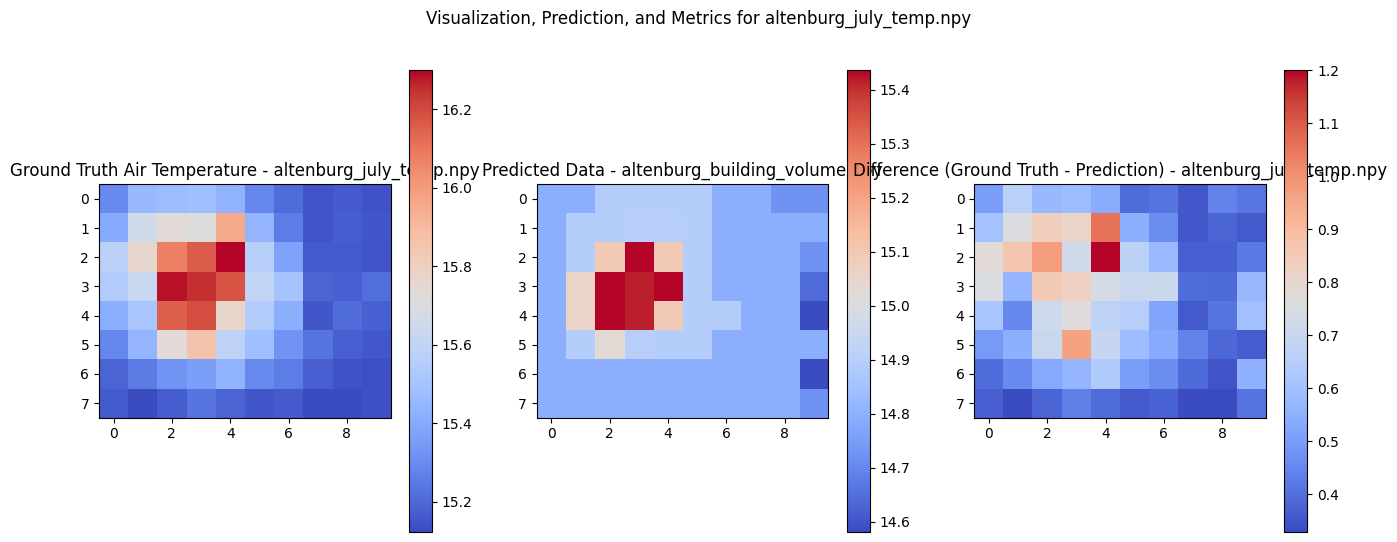

Ground Truth Data - erfurt_july_temp.npy: Min = 14.009677419354837, Max = 17.054838709677416
Predicted Data - erfurt_building_volume.npy: Min = 14.44629192352295, Max = 16.085588455200195
PSNR for erfurt_july_temp.npy: 16.069933232697675
SSIM for erfurt_july_temp.npy: 0.7191215726363587
LPIPS for erfurt_july_temp.npy: 0.00022186784190125763


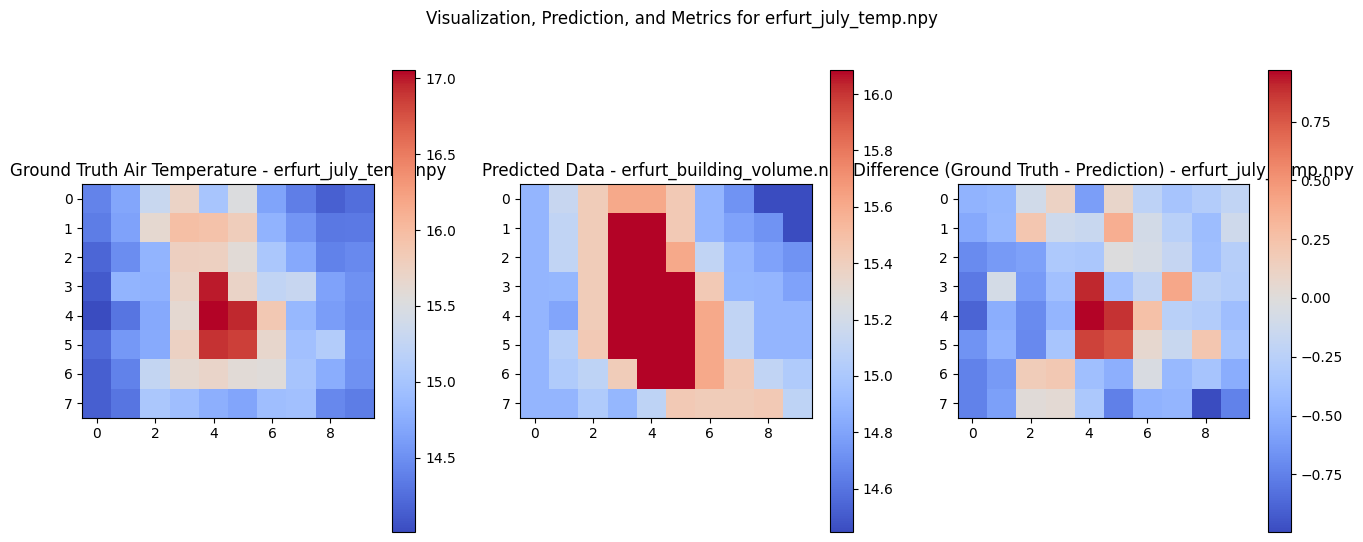

Ground Truth Data - gera_july_temp.npy: Min = 14.909677419354841, Max = 18.08387096774194
Predicted Data - gera_building_volume.npy: Min = 14.725075721740723, Max = 16.085588455200195
PSNR for gera_july_temp.npy: 12.129415160867826
SSIM for gera_july_temp.npy: 0.7226957888560648
LPIPS for gera_july_temp.npy: 0.0001222748396685347


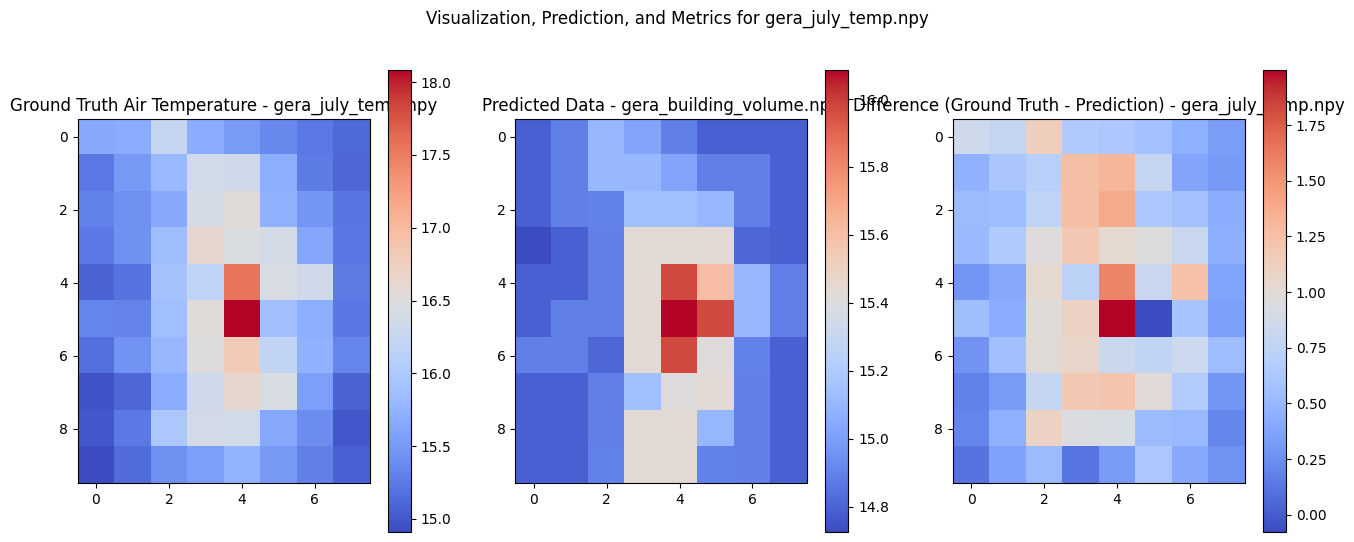

Ground Truth Data - gotha_july_temp.npy: Min = 13.190322580645162, Max = 14.880645161290325
Predicted Data - gotha_building_volume.npy: Min = 14.44629192352295, Max = 15.60619831085205
PSNR for gotha_july_temp.npy: 4.853575249077017
SSIM for gotha_july_temp.npy: 0.7703276588963384
LPIPS for gotha_july_temp.npy: 4.299235297366977e-05


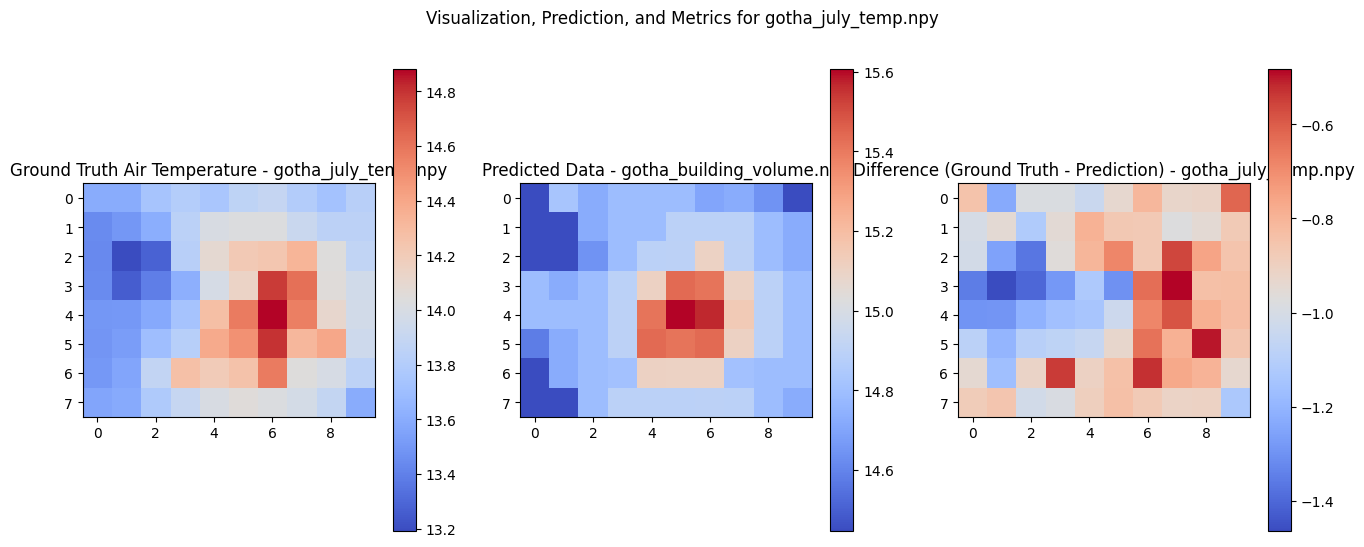

Ground Truth Data - jena_july_temp.npy: Min = 14.377419354838707, Max = 18.00967741935484
Predicted Data - jena_building_volume.npy: Min = 14.683175086975098, Max = 16.085588455200195
PSNR for jena_july_temp.npy: 11.554114770406885
SSIM for jena_july_temp.npy: 0.616450015203767
LPIPS for jena_july_temp.npy: 0.0003104413044638932


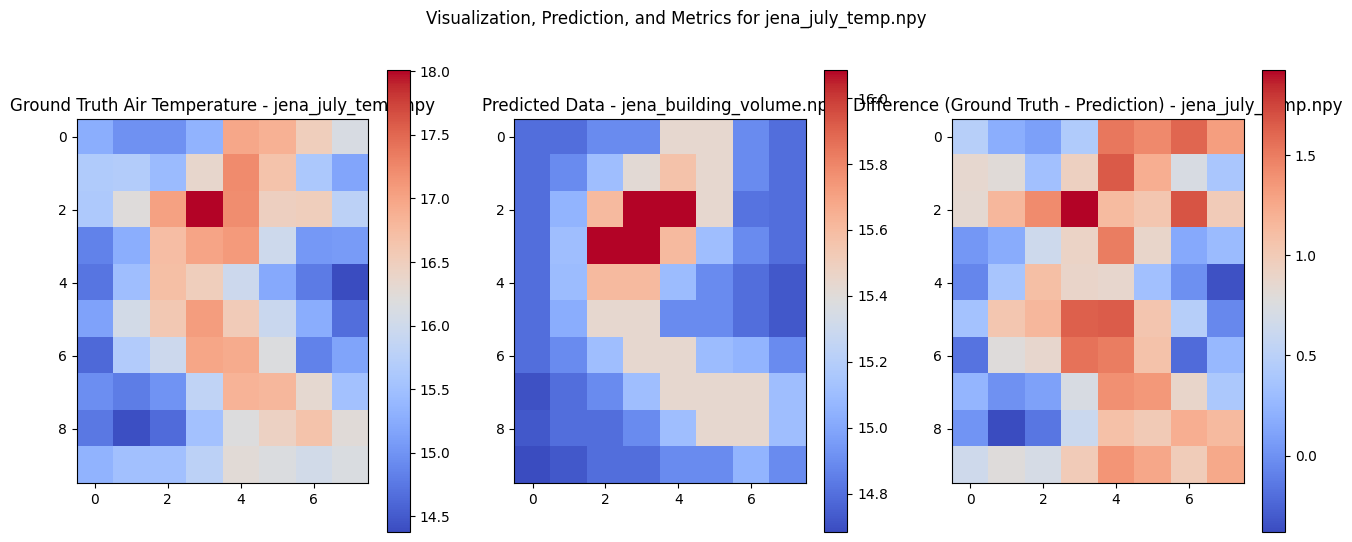

Ground Truth Data - schmalkalden_july_temp.npy: Min = 15.135483870967743, Max = 16.84193548387097
Predicted Data - schmalkalden_building_volume.npy: Min = 14.011757850646973, Max = 15.107702255249023
PSNR for schmalkalden_july_temp.npy: 2.684488574321678
SSIM for schmalkalden_july_temp.npy: 0.4717086039368439
LPIPS for schmalkalden_july_temp.npy: 0.0001013502333080396


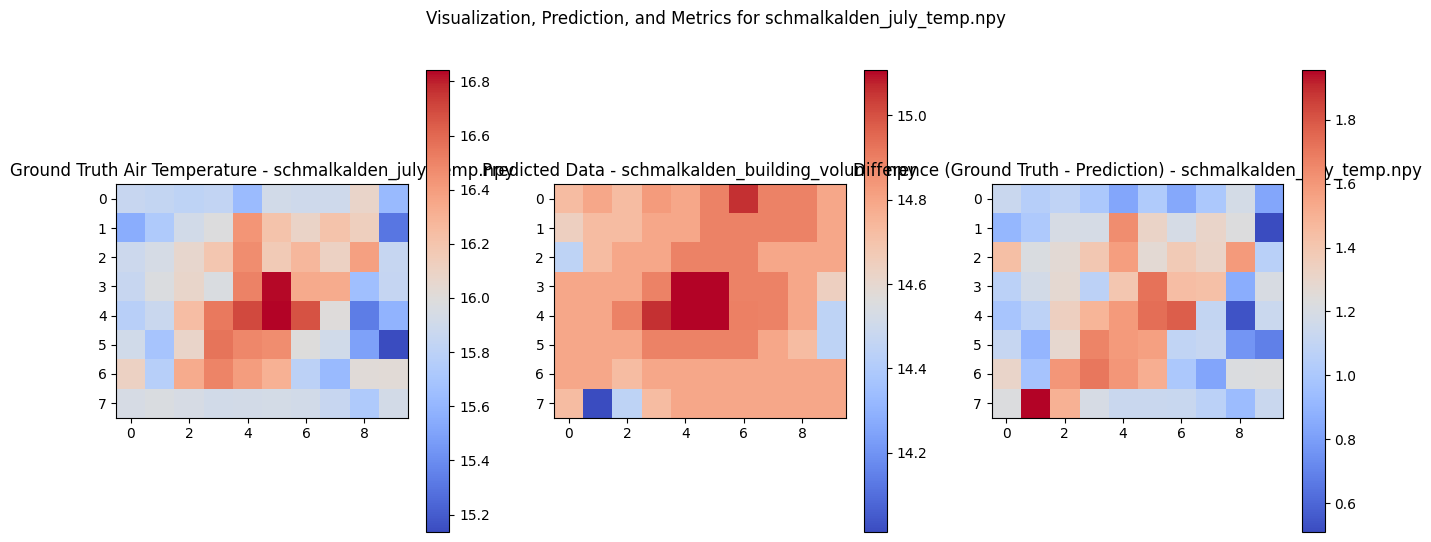

Ground Truth Data - sondershausen_july_temp.npy: Min = 13.94516129032258, Max = 16.429032258064517
Predicted Data - sondershausen_building_volume.npy: Min = 14.44629192352295, Max = 15.107702255249023
PSNR for sondershausen_july_temp.npy: 12.975423716913637
SSIM for sondershausen_july_temp.npy: 0.45063086569238586
LPIPS for sondershausen_july_temp.npy: 0.00028706653392873704


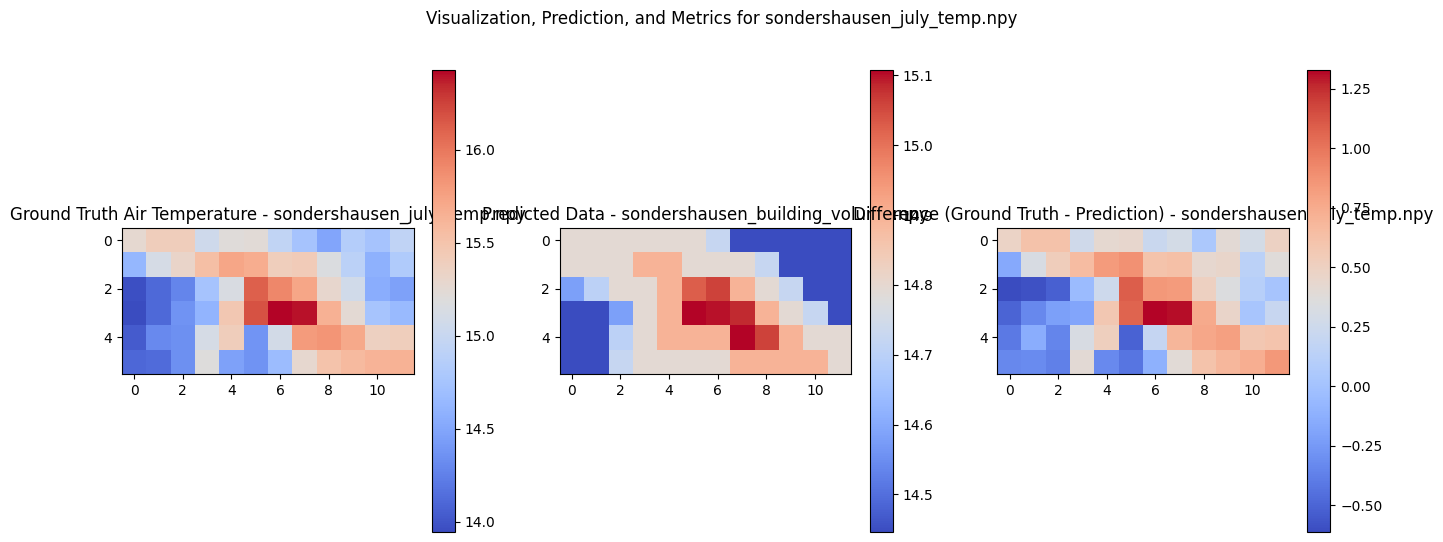

Ground Truth Data - sonneberg_july_temp.npy: Min = 13.980645161290324, Max = 16.290322580645164
Predicted Data - sonneberg_building_volume.npy: Min = 14.011757850646973, Max = 15.436975479125977
PSNR for sonneberg_july_temp.npy: 13.873098167490088
SSIM for sonneberg_july_temp.npy: 0.46072167023297367
LPIPS for sonneberg_july_temp.npy: 0.0001412721030646935


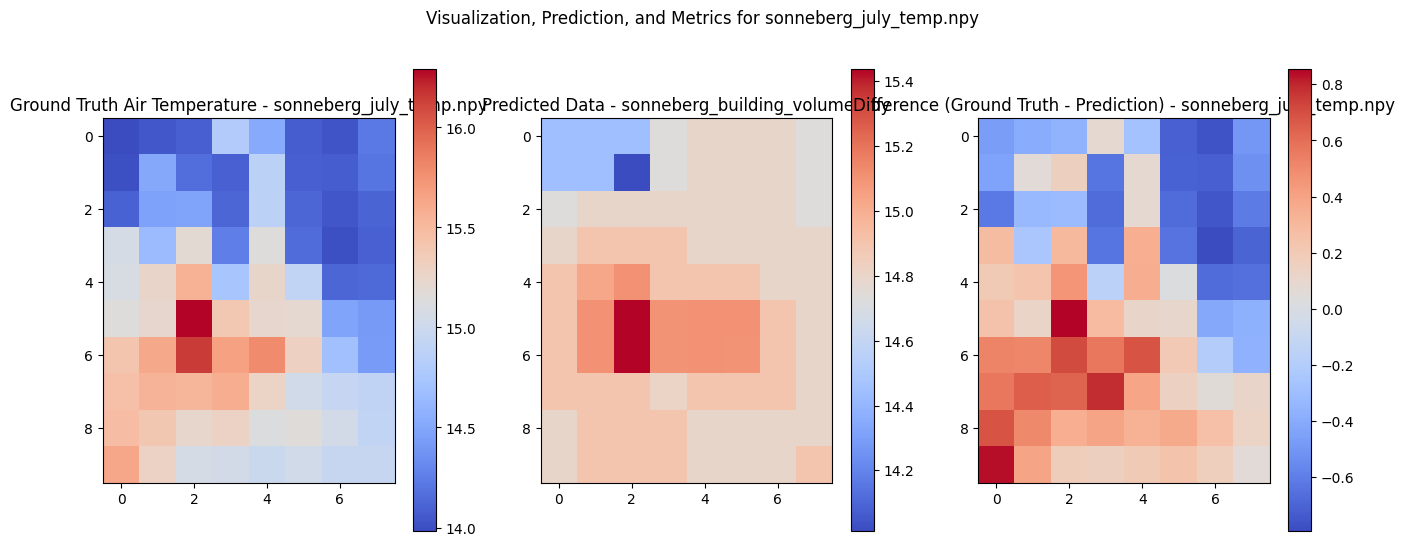

Ground Truth Data - suhl_july_temp.npy: Min = 11.370967741935484, Max = 14.83548387096774
Predicted Data - suhl_building_volume.npy: Min = 14.011757850646973, Max = 15.436975479125977
PSNR for suhl_july_temp.npy: 6.48326117161072
SSIM for suhl_july_temp.npy: 0.46702378486608603
LPIPS for suhl_july_temp.npy: 0.00021364199346862733


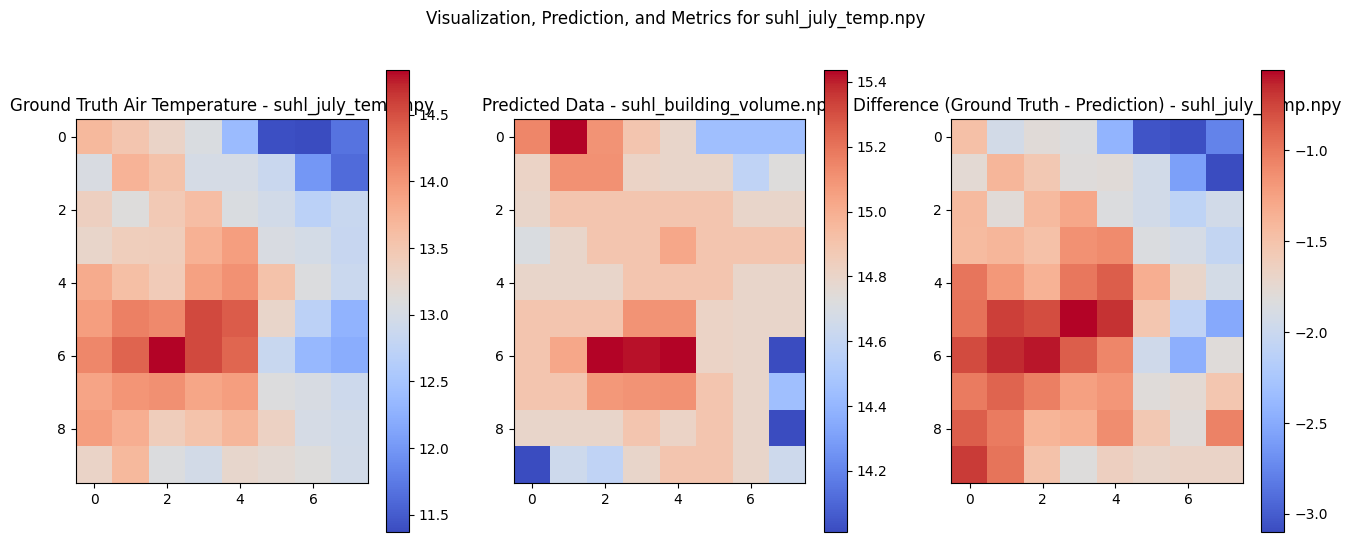

Ground Truth Data - weimar_july_temp.npy: Min = 12.94516129032258, Max = 16.29032258064516
Predicted Data - weimar_building_volume.npy: Min = 14.581095695495605, Max = 16.085588455200195
PSNR for weimar_july_temp.npy: 13.174374919724876
SSIM for weimar_july_temp.npy: 0.7154630509353176
LPIPS for weimar_july_temp.npy: 0.00010414428834337741


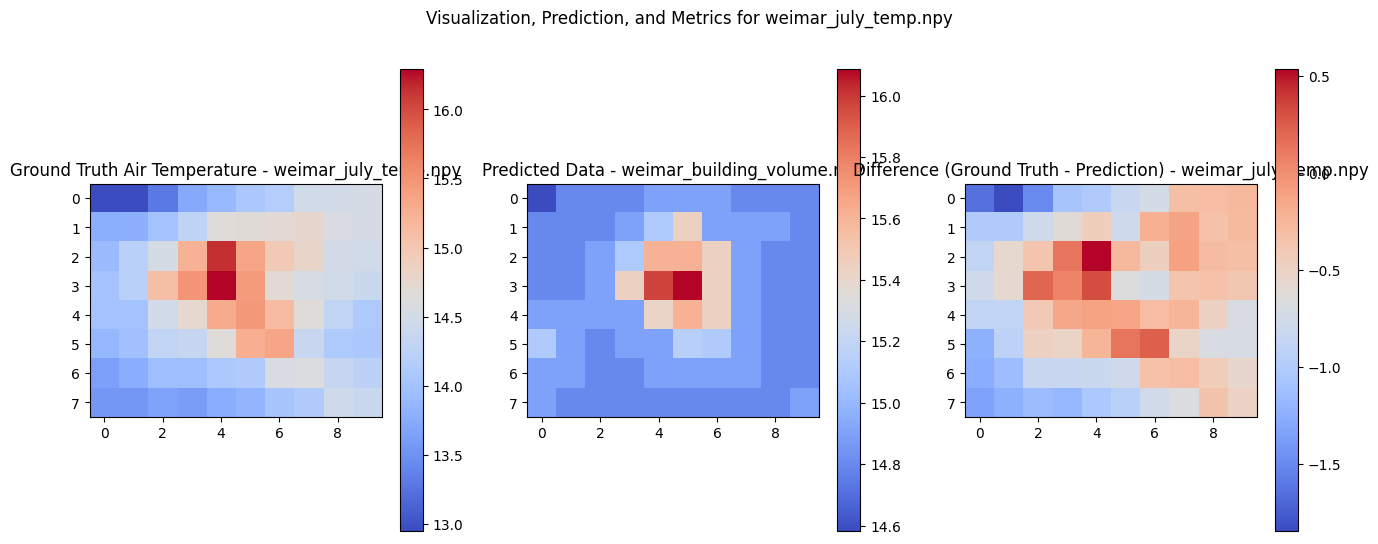

In [9]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import lpips
import torch
import cv2

def calculate_psnr(gt_image, pred_image):
    return psnr(gt_image, pred_image, data_range=gt_image.max() - gt_image.min())

def calculate_ssim(gt_image, pred_image):
    return ssim(gt_image, pred_image, data_range=gt_image.max() - gt_image.min(), multichannel=True,win_size=5)

def calculate_lpips(gt_image, pred_image, model):
    # Ensure images are of a standard size, e.g., 64x64
    gt_image_resized = cv2.resize(gt_image, (64, 64))
    pred_image_resized = cv2.resize(pred_image, (64, 64))
    
    # Ensure the images are 3D
    if len(gt_image_resized.shape) == 2:
        gt_image_resized = np.expand_dims(gt_image_resized, axis=-1)
    if len(pred_image_resized.shape) == 2:
        pred_image_resized = np.expand_dims(pred_image_resized, axis=-1)

    # Convert to tensors
    gt_image_tensor = torch.tensor(gt_image_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    pred_image_tensor = torch.tensor(pred_image_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0
    
    # Compute LPIPS score
    lpips_score = model(gt_image_tensor, pred_image_tensor)
    return lpips_score.item()



def visualize_and_predict(input_folder, prediction_folder, model):
    """
    Loads .npy files from two folders, performs predictions on one set, and visualizes them side by side.
    Additionally, calculates LPIPS, SSIM, and PSNR metrics for each pair of images.
    
    Parameters:
    - input_folder (str): Folder containing ground truth data.
    - prediction_folder (str): Folder containing data to predict.
    - model (RandomForestRegressor): Model used for predictions.
    """
    # Initialize LPIPS model
    lpips_model = lpips.LPIPS(net='alex')

    # List files in both directories
    input_files = sorted([f for f in os.listdir(input_folder) if f.endswith('.npy')])
    prediction_files = sorted([f for f in os.listdir(prediction_folder) if f.endswith('.npy')])
    
    # Iterate through the files
    for input_file, prediction_file in zip(input_files, prediction_files):
        # Load ground truth data
        input_path = os.path.join(input_folder, input_file)
        input_data = np.load(input_path)
        
        # Display min and max values for ground truth
        input_min, input_max = np.min(input_data), np.max(input_data)
        print(f'Ground Truth Data - {input_file}: Min = {input_min}, Max = {input_max}')
        
        plt.figure(figsize=(16, 6))
        
        plt.subplot(1, 3, 1)
        plt.imshow(input_data, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Ground Truth Air Temperature - {input_file}')
        
        # Load prediction data and make prediction
        prediction_path = os.path.join(prediction_folder, prediction_file)
        prediction_data = np.load(prediction_path)
        prediction_data_flat = prediction_data.flatten().reshape(-1, 1)
        prediction = model.predict(prediction_data_flat)
        prediction_reshaped = prediction.reshape(prediction_data.shape)
        
        # Display min and max values for predicted data
        prediction_min, prediction_max = np.min(prediction_reshaped), np.max(prediction_reshaped)
        print(f'Predicted Data - {prediction_file}: Min = {prediction_min}, Max = {prediction_max}')
        
        plt.subplot(1, 3, 2)
        plt.imshow(prediction_reshaped, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Predicted Data - {prediction_file}')
        
        # Resize images if needed (to ensure same size)
        if input_data.shape != prediction_reshaped.shape:
            prediction_reshaped = cv2.resize(prediction_reshaped, (input_data.shape[1], input_data.shape[0]))
        
        # Calculate PSNR
        psnr_value = calculate_psnr(input_data, prediction_reshaped)
        print(f"PSNR for {input_file}: {psnr_value}")
        
        # Calculate SSIM
        ssim_value = calculate_ssim(input_data, prediction_reshaped)
        print(f"SSIM for {input_file}: {ssim_value}")
        
        # Calculate LPIPS
        lpips_value = calculate_lpips(input_data, prediction_reshaped, lpips_model)
        print(f"LPIPS for {input_file}: {lpips_value}")
        
        # Plot difference between ground truth and prediction
        difference = input_data - prediction_reshaped
        plt.subplot(1, 3, 3)
        plt.imshow(difference, cmap='coolwarm', interpolation='nearest')
        plt.colorbar()
        plt.title(f'Difference (Ground Truth - Prediction) - {input_file}')
        
        plt.suptitle(f'Visualization, Prediction, and Metrics for {input_file}')
        plt.show()

# Example paths and model initialization (replace with actual model)
input_folder = 'C:/Users/bb26k/Desktop/weighting/air_temp'
prediction_folder = 'C:/Users/bb26k/Desktop/weighting/smoothed'

# Call the function (model must be properly defined and trained beforehand)
visualize_and_predict(input_folder, prediction_folder, model4)